<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# EDA with Walmart Sales Data

## Business Objectives

Walmart, the retail giant that operates a chain of hypermarkets, wants to understand their weekly sales data, especially the impact from holidays and or big events on the weekly sales data; specifically, Super Bowl, Labor Day, Thanksgiving, and Christmas. In addition, Walmart wants to consider the effect from different macroeconomic/external factors. 

## Learning Objectives

At the end of this session, you will know how to

1. Manipulate data of different types using `pandas`
1. Visualize data with `matplotlib` and `seaborn` to extract insights 
1. Perform feature engineering
1. Build a pipeline to preprocess data and fit a simple model using `sklearn`

*Note: if you see code that's unfamiliar to you, look up for the documentation, and try to understand what it does.*

## Data Overview

- Original sales data were collected from 45 stores across the United States; yet for this session, you will first inspect data from three stores and later focus on just store 1. 

- Each store is of certain type and size, and there are multiple departments in a store. 

- The dataset has a temporal component, we ignore this mostly in this session and will discuss time series related techniques later in the cohort.

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
import warnings
warnings.filterwarnings("ignore")

## Task I: Load Data 

Built on top of `numpy`, `pandas` is one of the most widely used tools in machine learning. Its rich features are used for exploring, cleaning, visualizing, and transforming data.  We need to import the library to access all of its features. 

In [4]:
import pandas as pd

Use `pd.read_csv` to read `train_comb.csv` that contains weekly sales, metadata, and macroeconomic features from three stores into a `pd.DataFrame`.

In [5]:
filepath = 'https://raw.githubusercontent.com/AnjanaSengupta/MLE-Oct-2022/main/assignments/week-04-data-eng-airflow/dat/train_comb.csv'
walmart_sls = pd.read_csv(filepath) 

Verify that the data is loaded correctly by running `data.head(3)` to see the first few row ( AVOID printing out the entire DataFrame, i.e., `data` or `print(data)`; it might be trivial for small dataset but it can crash your kernel when the dataset is big and slow down the initial data exploration process ).

In [6]:
walmart_sls.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315


In [7]:
walmart_sls.sample(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
23306,13,21,2011-12-30,9916.35,True,31.53,3.119,5970.81,89121.94,406.40,1772.02,3645.00,130.071032,6.392,A,219622
22050,13,11,2012-02-03,20160.11,False,31.39,3.077,53423.29,5822.12,282.08,57817.56,9654.23,130.349677,6.104,A,219622
17010,4,55,2012-07-06,14260.78,False,80.37,3.187,9789.03,90.00,157.62,10671.47,3864.91,130.719633,4.077,A,205863


❓ Question 1:

Look at the output to get an idea of what each column is and then write a few sentences describing what you notice about the data. You can also use `data.sample(3)` to draw random samples from the data (hints: number of rows and columns, any missing values? data types of the elements? date ranges of the data collected? etc.).

The data consists of weekly sales figures for different departments in the megastore Walmart along with other factors such as - outside temperature, CPI, unemployment, fuel price, etc. There are approximately 31k rows of entries (rows) and 16 variables (columns). It's a reasonable-sized dataset.

Most of the data are numerical. There is a date column and two categorical variables. The years covered are 2010, 2011, 2012. Four 'markdown' columns have missing and/or NAN entries, presumably because there were many weeks when there was no markdowns given out in any department. There is also an indicator variable called "Is Holiday", which tells us whether that day was a holiday or not. 

The dataset lends itself to analysis of what factores (internal/external) affects weekly sales at the store - are they external factors such as temperature, unemployment, fuel price, and CPI (out of control of Walmart executives and employees) or internal factors such markdowns, holidays, departments, and size of store (within control of Walmart)?

*Acceptable responses include the number of rows and columns in the dataset, the data types of the elements, how many NaNs there are (and perhaps which columns and/or rows tend to have them), the range of values in each column or other descriptive statistics, some commentary on what this data represents, any initial concerns about how you think we should model this data, or any other commentary you would like to add.*

Use `.shape` to inspect the size of the data: sample size and number of features.

In [8]:
walmart_sls.shape

(30990, 16)

<details>
<summary>Expected Output</summary>
(30990, 16)
</details>

For the following task, we focus on Store `1` only, 

In [9]:
data_store1 = walmart_sls[walmart_sls.Store==1]

In [10]:
data_store1.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315


In [11]:
data_store1.tail(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
10241,1,99,2012-09-14,0.03,False,74.97,3.717,17212.52,7.0,18.79,1523.11,7992.72,222.582019,6.908,A,151315
10242,1,99,2012-10-05,635.00,False,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,223.181477,6.573,A,151315
10243,1,99,2012-10-12,80.00,False,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,A,151315


Retrieve the data from department 9 ( a random choice ) at store 1:

In [12]:
data_store1_dep5 = data_store1[data_store1.Dept == 5]
data_store1_dep5.shape

(143, 16)

In [13]:
data_store1_dep7 = data_store1[data_store1.Dept == 7]

In [14]:
data_store1_dep7.shape

(143, 16)

In [15]:
data_store1_dep7.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
858,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
859,1,7,2010-02-12,18310.31,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315


In [16]:
data_store1_dept9 = data_store1[data_store1.Dept == 9] 

Verify the result using `.head()`, `.shape`.

In [17]:
data_store1_dept9.head()
data_store1_dept9.shape

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
1144,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1145,1,9,2010-02-12,16562.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
1146,1,9,2010-02-19,15880.85,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
1147,1,9,2010-02-26,15175.52,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
1148,1,9,2010-03-05,24064.70,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


(143, 16)

<details>
<summary>Expected Output</summary>
(143, 16)
</details>


Visualize one full year of sales. The data came with dates sorted, but we can make sure of it and then visualize the first 52 data  points.

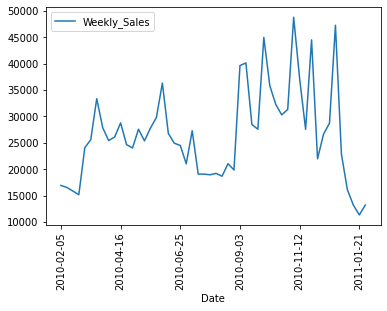

In [18]:
data_store1_dept9 = data_store1_dept9.sort_values('Date')
data_store1_dept9[['Date', 'Weekly_Sales']].iloc[:52]\
    .set_index('Date').plot(rot=90);

❓ Question 2:

Do you have any hypotheses about the holidays' impact on the sales?

From Labor Day onwards, through Halloween, Thanksgiving, Christmas, and New Year - the sales are high, peaking during post Thanksgiving season. Then the sales drop precipitously after New Years. This is accordance with what we have observed and the data confirms what we know from common experience.

**For the purpose of this notebook, we focus on the sales data from Store 1** in DataFrame `df` and is saved in `train_store1.csv`. Let's read in the data.

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/AnjanaSengupta/MLE-Oct-2022/main/assignments/week-04-data-eng-airflow/dat/train-store1.csv")

Extract week, month, and year information from the raw `Date` column to better manipulate the weekly data later. Pandas comes with powerful features to make this step easy. Reference: [tutorial
](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html). 

First, use `.dtypes` to check the datatype of the `Date` column. What's the difference between `df[['Date']]` and `df['Date']`?.

In [20]:
df['Date']

0        2010-02-05
1        2010-02-12
2        2010-02-19
3        2010-02-26
4        2010-03-05
            ...    
10239    2012-08-31
10240    2012-09-07
10241    2012-09-14
10242    2012-10-05
10243    2012-10-12
Name: Date, Length: 10244, dtype: object

In [21]:
df[['Date']]

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
10239,2012-08-31
10240,2012-09-07
10241,2012-09-14
10242,2012-10-05


In [22]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

<details>
<summary>Expected Output</summary>
Date    object
dtype: object
</details>

In [23]:
df.Date=pd.to_datetime(df.Date)

In [24]:
df.Date.dtypes

dtype('<M8[ns]')

Verify that the `Date` column's datatype has changed as expected:

In [25]:
df[['Date']].dtypes 

Date    datetime64[ns]
dtype: object

In [26]:
df['week'] = df.Date.dt.week
df['month'] = df.Date.dt.month 
df['year'] = df.Date.dt.year 

Verify that now there are 19 columns in `df`:

In [27]:
df.shape

(10244, 19)

❓ Question 3:

Last step before we look deeper into the features is to split the data set into training and testing datasets. Discuss: why do we want to perform EDA only on the training data, not the entire dataset? Shouldn't it be the more the better?

No, we want to perform EDA only on the training data and not the entire dataset as [1] we want to keep the test and training datasets separate so  the model is not affected and/or contaminated by the test data [2] if we test the model on the data that we used to develop the model, we are going to get artificially good results. 

*The answer should mention data leakage, and / or overfitting*

Split the data into training (80%) and test dataset (20%). Use function `train_test_split` from `scikit-learn` ( a popular library for machine learning in Python ),  and set `random_state` to be 42 for reproducibility ( this is not the best way to do train-test-split due to the temporal nature of the data, however, we will ignore it for now ).

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_test_split(df, test_size=0.2, random_state=42)
df_train, df_test =  train_test_split(df)
df_train['Type'] = 'Train'
df_test['Type'] = 'Test'

final_df = df_train.append(df_test)


[      Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
 4549      1    34 2010-02-26      12005.00      False        46.63   
 6496      1    52 2012-07-06       2377.08      False        81.57   
 550       1     4 2012-06-01      41566.55      False        77.95   
 7235      1    60 2010-06-04       1144.00      False        80.69   
 2519      1    19 2012-05-11       1848.79      False        73.77   
 ...     ...   ...        ...           ...        ...          ...   
 5734      1    44 2010-12-10       6310.08      False        46.33   
 5191      1    38 2011-07-01      68879.85      False        85.55   
 5390      1    40 2012-07-27      53286.98      False        82.66   
 860       1     7 2010-02-19      19985.20      False        39.93   
 7270      1    60 2011-02-04       1188.00      False        42.27   
 
       Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
 4549       2.561        NaN        NaN        NaN        NaN        N

In [30]:
print('Original set  ---> ',df.shape,
      '\nTraining set  ---> ',df_train.shape,
      '\nTesting set   ---> ', df_test.shape)

Original set  --->  (10244, 19) 
Training set  --->  (7683, 19) 
Testing set   --->  (2561, 19)


<details>
<summary>Expected Output</summary>

    ```
    Original set  --->  (10244, 19) 
    Training set  --->  (8195, 19) 
    Testing set   --->  (2049, 19)
    ```
</details>

## Task II: Target, Features, and Distributions

We inspect the datatype of column `Date`; now find datatypes for all columns in `df_train` using `.dtypes`:

In [31]:
df_train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
week                     int64
month                    int64
year                     int64
dtype: object

<details>
<summary>Expected Output</summary>

```
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
week                     int64
month                    int64
year                     int64
dtype: object
```
</details>

Summary statistics provide you with a general understanding of the data. Use method `.describe()`. By default it reports statistics mean, max, min, quantiles for numerical features and counts, unique, mode for categorical features.

In [32]:
pd.options.display.float_format = "{:,.2f}".format
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,"10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","3,657.00","3,015.00","3,588.00","3,657.00","3,657.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00"
mean,1.00,44.39,"21,710.54",68.22,3.22,"8,086.73","2,967.16","1,245.40","3,755.21","5,027.75",216.00,7.61,"151,315.00",25.84,6.45,"2,010.96"
std,0.00,29.87,"27,748.95",14.20,0.43,"6,542.42","7,911.85","7,867.46","5,950.68","3,267.92",4.34,0.38,0.00,14.17,3.25,0.80
min,1.00,1.00,-863.00,35.40,2.51,410.31,0.50,0.25,8.00,554.92,210.34,6.57,"151,315.00",1.00,1.00,"2,010.00"
25%,1.00,20.00,"3,465.62",57.79,2.76,"4,039.39",40.48,6.00,577.14,"3,127.88",211.53,7.35,"151,315.00",14.00,4.00,"2,010.00"
50%,1.00,38.00,"10,289.38",69.64,3.29,"6,154.14",137.86,30.23,"1,822.55","4,325.19",215.46,7.79,"151,315.00",26.00,6.00,"2,011.00"
75%,1.00,72.00,"31,452.96",80.48,3.59,"10,121.97","1,569.00",101.64,"3,750.59","6,222.25",220.64,7.84,"151,315.00",38.00,9.00,"2,012.00"
max,1.00,99.00,"203,670.47",91.65,3.91,"34,577.06","46,011.38","55,805.51","32,403.87","20,475.32",223.44,8.11,"151,315.00",52.00,12.00,"2,012.00"


In [33]:
df_train.describe()


,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,"7,683.00","7,683.00","7,683.00","7,683.00","7,683.00","2,748.00","2,266.00","2,695.00","2,748.00","2,748.00","7,683.00","7,683.00","7,683.00","7,683.00","7,683.00","7,683.00"
mean,1.00,44.48,"21,706.85",68.17,3.22,"8,032.10","3,126.09","1,206.66","3,721.11","5,031.48",216.01,7.61,"151,315.00",25.84,6.45,"2,010.97"
std,0.00,29.88,"27,854.80",14.29,0.42,"6,511.50","8,336.30","7,738.05","5,917.32","3,206.68",4.34,0.39,0.00,14.20,3.25,0.79
min,1.00,1.00,-863.00,35.40,2.51,410.31,0.50,0.25,8.00,554.92,210.34,6.57,"151,315.00",1.00,1.00,"2,010.00"
25%,1.00,20.00,"3,443.80",57.79,2.77,"4,039.39",40.48,6.00,577.14,"3,127.88",211.53,7.35,"151,315.00",14.00,4.00,"2,010.00"
50%,1.00,38.00,"10,256.27",69.31,3.29,"6,154.14",137.86,30.23,"1,822.55","4,325.19",215.48,7.79,"151,315.00",26.00,6.00,"2,011.00"
75%,1.00,72.00,"31,393.21",80.49,3.59,"9,873.33","1,569.00",101.64,"3,750.59","6,222.25",220.64,7.84,"151,315.00",38.00,9.00,"2,012.00"
max,1.00,99.00,"203,670.47",91.65,3.91,"34,577.06","46,011.38","55,805.51","32,403.87","20,475.32",223.44,8.11,"151,315.00",52.00,12.00,"2,012.00"


In [34]:
df_test.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,"2,561.00","2,561.00","2,561.00","2,561.00","2,561.00",909.00,749.00,893.00,909.00,909.00,"2,561.00","2,561.00","2,561.00","2,561.00","2,561.00","2,561.00"
mean,1.00,44.11,"21,721.62",68.39,3.21,"8,251.88","2,486.35","1,362.32","3,858.29","5,016.47",215.94,7.61,"151,315.00",25.85,6.45,"2,010.95"
std,0.00,29.83,"27,434.33",13.95,0.43,"6,635.90","6,441.25","8,249.07","6,052.53","3,448.26",4.33,0.38,0.00,14.09,3.24,0.81
min,1.00,1.00,-223.00,35.40,2.51,410.31,0.50,0.25,8.00,554.92,210.34,6.57,"151,315.00",1.00,1.00,"2,010.00"
25%,1.00,19.00,"3,536.70",58.74,2.73,"4,139.87",40.48,6.85,577.14,"3,127.88",211.53,7.35,"151,315.00",14.00,4.00,"2,010.00"
50%,1.00,37.00,"10,344.16",69.86,3.29,"6,186.19",151.88,21.70,"2,084.64","4,212.97",215.36,7.79,"151,315.00",26.00,6.00,"2,011.00"
75%,1.00,72.00,"31,571.96",80.48,3.59,"10,121.97","1,569.00",77.98,"3,750.59","6,149.04",220.64,7.84,"151,315.00",38.00,9.00,"2,012.00"
max,1.00,99.00,"194,839.60",91.65,3.91,"34,577.06","46,011.38","55,805.51","32,403.87","20,475.32",223.44,8.11,"151,315.00",52.00,12.00,"2,012.00"


<details>
<summary>Expected Output</summary>

```
	Store	Dept	Weekly_Sales	Temperature	Fuel_Price	MarkDown1	MarkDown2	MarkDown3	MarkDown4	MarkDown5	CPI	Unemployment	Size	week	month	year
count	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00	2,931.00	2,424.00	2,878.00	2,931.00	2,931.00	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00
mean	1.00	44.65	21,865.28	68.19	3.22	8,045.43	2,961.55	1,236.83	3,683.59	5,023.69	216.00	7.61	151,315.00	25.89	6.47	2,010.96
std	0.00	29.95	27,970.00	14.16	0.43	6,484.49	8,032.30	7,830.99	5,849.69	3,303.07	4.33	0.38	0.00	14.19	3.25	0.80
min	1.00	1.00	-863.00	35.40	2.51	410.31	0.50	0.25	8.00	554.92	210.34	6.57	151,315.00	1.00	1.00	2,010.00
25%	1.00	20.00	3,502.09	57.79	2.76	4,039.39	40.48	6.00	577.14	3,127.88	211.57	7.35	151,315.00	14.00	4.00	2,010.00
50%	1.00	38.00	10,357.32	69.64	3.29	6,154.14	137.86	30.23	1,822.55	4,325.19	215.46	7.79	151,315.00	26.00	6.00	2,011.00
75%	1.00	72.00	31,647.36	80.48	3.59	10,121.97	1,569.00	101.64	3,639.42	6,222.25	220.64	7.84	151,315.00	38.00	9.00	2,012.00
max	1.00	99.00	203,670.47	91.65	3.91	34,577.06	46,011.38	55,805.51	32,403.87	20,475.32	223.44	8.11	151,315.00	52.00	12.00	2,012.0
```
</details>

❓ Question 4:

Inspect the output, what are some of your observations?

The summary statistics of the train and test datasets are similar. From the summary statistics, it seems as though the test and training data sets are fairly equally distributed. This is an ideal situation, although probably not very realistic. 

Are there any missing values? Use `.isna()` and `.sum()` to show the number of missing values from each column.

In [35]:
df.isna()
df.isna().sum()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10240,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10241,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10242,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       6587
MarkDown2       7229
MarkDown3       6656
MarkDown4       6587
MarkDown5       6587
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64

<details>
<summary>Expected Output</summary>

```
Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       5264
MarkDown2       5771
MarkDown3       5317
MarkDown4       5264
MarkDown5       5264
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64
```
</details>

What do you think the target variable is in this problem? Assign the column name to `target` for later use.

In [36]:
target = df['Weekly_Sales']

In [37]:
target.head(5)

0   24,924.50
1   46,039.49
2   41,595.55
3   19,403.54
4   21,827.90
Name: Weekly_Sales, dtype: float64

In [38]:
target.sample(3)

2560    5,115.39
4630    7,987.56
9544   64,872.11
Name: Weekly_Sales, dtype: float64

In [39]:
target.tail(5)

10239    20.06
10240     0.05
10241     0.03
10242   635.00
10243    80.00
Name: Weekly_Sales, dtype: float64

In [40]:
target.describe()

count    10,244.00
mean     21,710.54
std      27,748.95
min        -863.00
25%       3,465.62
50%      10,289.38
75%      31,452.96
max     203,670.47
Name: Weekly_Sales, dtype: float64

Visualize the distribution of target variable using `distplot()` from library `seaborn` ( Why seaborn? Check out a comparison between Matplotlib and Seaborn [here](https://analyticsindiamag.com/comparing-python-data-visualization-tools-matplotlib-vs-seaborn/) ). Anything here you observe but the output from `.describe` does not make obvious? Does it follow a normal distribution?

The distribution is skewed. It has the highest frequency near 0 (i.e., very small weekly sales values, which is difficult to believe/understand). But it also has a large tail, which means there are weeks with very high sales.

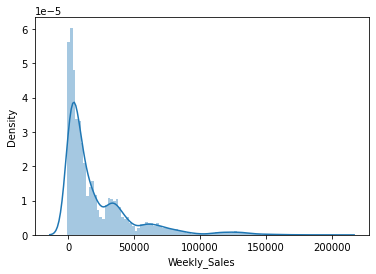

In [41]:
import seaborn as sns
sns.distplot(target,bins=100);

Notice that there exists nonpositive weekly sales. How many of rows are there that the weekly sales are negative or 0?

In [42]:
non_pos_weekly_sales = df[target <= 0] # Expected Output: 13

In [43]:
(df_test[target <= 0]).describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,3.00,3.00,3.00,3.00,3.00,1.00,1.00,1.00,1.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00
mean,1.00,47.33,-140.33,80.84,3.64,"6,118.56",9.48,4.97,426.72,"3,657.22",217.39,7.76,"151,315.00",23.67,6.00,"2,011.33"
std,0.00,0.58,122.17,13.15,0.15,NaN,NaN,NaN,NaN,NaN,3.38,0.35,0.00,10.41,2.65,0.58
min,1.00,47.00,-223.00,65.93,3.48,"6,118.56",9.48,4.97,426.72,"3,657.22",215.28,7.35,"151,315.00",12.00,3.00,"2,011.00"
25%,1.00,47.00,-210.50,75.88,3.56,"6,118.56",9.48,4.97,426.72,"3,657.22",215.44,7.65,"151,315.00",19.50,5.00,"2,011.00"
50%,1.00,47.00,-198.00,85.83,3.64,"6,118.56",9.48,4.97,426.72,"3,657.22",215.61,7.96,"151,315.00",27.00,7.00,"2,011.00"
75%,1.00,47.50,-99.00,88.30,3.71,"6,118.56",9.48,4.97,426.72,"3,657.22",218.45,7.96,"151,315.00",29.50,7.50,"2,011.50"
max,1.00,48.00,0.00,90.76,3.79,"6,118.56",9.48,4.97,426.72,"3,657.22",221.29,7.96,"151,315.00",32.00,8.00,"2,012.00"


In [44]:
df_train[target <= 0].describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,15.00,15.00,15.00,15.00,15.00,6.00,5.00,6.00,6.00,6.00,15.00,15.00,15.00,15.00,15.00,15.00
mean,1.00,43.73,-235.79,62.25,3.33,"9,992.37","2,301.43",121.54,"3,961.98","3,627.81",216.66,7.65,"151,315.00",20.47,5.27,"2,011.13"
std,0.00,13.39,278.73,14.76,0.44,"6,558.76","4,898.36",252.70,"3,396.55","1,309.14",4.06,0.35,0.00,15.02,3.45,0.74
min,1.00,6.00,-863.00,39.93,2.51,"2,725.36",7.50,2.02,24.90,"2,017.69",211.29,6.91,"151,315.00",3.00,1.00,"2,010.00"
25%,1.00,47.00,-398.00,50.76,3.06,"5,691.95",40.48,6.21,"1,184.74","2,869.83",212.97,7.35,"151,315.00",10.00,3.00,"2,011.00"
50%,1.00,47.00,-139.65,63.93,3.49,"10,102.19",151.88,8.32,"3,851.00","3,331.85",215.73,7.74,"151,315.00",14.00,4.00,"2,011.00"
75%,1.00,47.00,-18.00,69.79,3.65,"11,159.92",245.00,54.87,"6,467.53","4,477.83",220.74,7.87,"151,315.00",32.50,8.00,"2,012.00"
max,1.00,54.00,0.00,89.94,3.91,"21,290.13","11,062.27",634.70,"8,409.31","5,509.84",221.96,8.11,"151,315.00",51.00,12.00,"2,012.00"


In [45]:
non_pos_weekly_sales.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,18.00,18.00,18.00,18.00,18.00,7.00,6.00,7.00,7.00,7.00,18.00,18.00,18.00,18.00,18.00,18.00
mean,1.00,44.33,-219.88,65.35,3.38,"9,438.97","1,919.43",104.89,"3,456.95","3,632.01",216.78,7.66,"151,315.00",21.00,5.39,"2,011.17"
std,0.00,12.23,258.99,15.83,0.42,"6,163.73","4,480.03",234.85,"3,376.27","1,195.13",3.87,0.35,0.00,14.15,3.27,0.71
min,1.00,6.00,-863.00,39.93,2.51,"2,725.36",7.50,2.02,24.90,"2,017.69",211.29,6.91,"151,315.00",3.00,1.00,"2,010.00"
25%,1.00,47.00,-279.25,54.62,3.15,"5,208.36",17.23,5.48,549.08,"3,000.23",214.35,7.35,"151,315.00",10.00,3.00,"2,011.00"
50%,1.00,47.00,-168.82,65.34,3.50,"9,873.33",96.18,6.85,"2,724.65","3,402.66",215.70,7.74,"151,315.00",16.00,4.50,"2,011.00"
75%,1.00,47.00,-16.50,74.60,3.66,"10,883.63",221.72,39.84,"5,970.81","4,246.72",220.90,7.94,"151,315.00",32.00,8.00,"2,012.00"
max,1.00,54.00,0.00,90.76,3.91,"21,290.13","11,062.27",634.70,"8,409.31","5,509.84",221.96,8.11,"151,315.00",51.00,12.00,"2,012.00"


What percentage is the negative and zero sales?

In [46]:
# YOUR CODE HERE

<details>
<summary>Expected Output</summary>

`0.0015863331299572911` or `0.16%`
</details>

After communicating your findings, the stakeholders confirm that you can remove these data entries for now and they are launching an investigation by analysts and data engineers. 

Now remove them from the training dataset.

In [47]:
mask = df[target > 0]
df_pos_train = df_train[target > 0]
df_pos_train.shape # Expected Output: (8182, 19)

(7668, 19)

Let's move on to features. 

Though almost all the come through as numerical, should they all be treated as numerical features? Let's inspect the number of unique values: 

In [48]:
[(col, df[col].nunique())for col in df_train.columns]

[('Store', 1),
 ('Dept', 77),
 ('Date', 143),
 ('Weekly_Sales', 10042),
 ('IsHoliday', 2),
 ('Temperature', 143),
 ('Fuel_Price', 137),
 ('MarkDown1', 51),
 ('MarkDown2', 41),
 ('MarkDown3', 49),
 ('MarkDown4', 51),
 ('MarkDown5', 51),
 ('CPI', 143),
 ('Unemployment', 12),
 ('Type', 1),
 ('Size', 1),
 ('week', 52),
 ('month', 12),
 ('year', 3)]

`Temperature`, `CPI`, `Unemployment`, `Fuel_Price` are continuous. Those tie to the second business objective. Let us put these four into a list and store it in `external_factors`. From earlier, we noticed that `MarkDownx` columns contain some missing values, we will treat them in a later task. 

In [49]:
external_factors = ['Temperature','CPI','Unemployment', 'Fuel_Price']

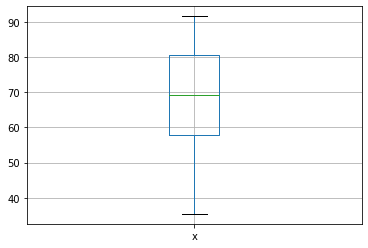

In [50]:
pd.DataFrame.boxplot(df_train.Temperature, figsize=(6,4))

Visualize Temperature in a box plot, what do you think is the advantage of a box plot over a histogram? You can use `pd.DataFrame.boxplot()`, set the figure size as (6, 4), and turn off the grid.

❓ Question 5:

Visualize Temperature in a box plot, what do you think the advantage of a box plot over histogram? 

HINT: You can use `pd.DataFrame.boxplot()`, set the figure size as (6, 4), and turn off the grid.

Boxplots don't just show frequency but also the extreme data points, i.e., outliers. Thus, they show not only show how the data is distributed but the range of the data, especially the extreme values (high/low) which affects  summary statistics and subsequently affects model fit in a critical way. 

Let's visualize all four numerical features in both density plot and box plot. Note any observations.

                                 Numeric Features Distribution                                  


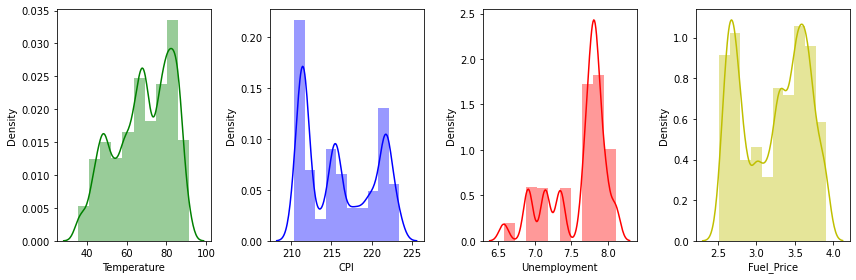

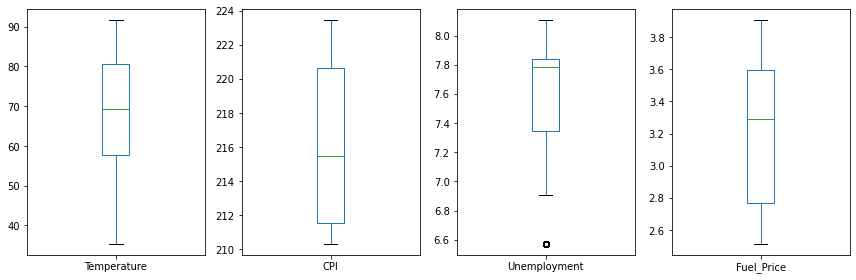

In [51]:
import matplotlib.pyplot as plt
print('\033[1mNumeric Features Distribution'.center(100))

figsize = (12, 4)

n=len(external_factors)
colors = ['g', 'b', 'r', 'y', 'k']

# histogram
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    sns.distplot(df_train[external_factors[i]],
                 bins=10, 
                 color = colors[i])
plt.tight_layout();

# boxplot
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    df_train.boxplot(external_factors[i], grid=False)
plt.tight_layout();

We will investigate the impacts of the external factors later. Now let's scan through the other features.

`Store`, `Type`, and `Size` each has only one unique value, offering no information, we can safely ignore them. 

We extracted `year`, `month`, and `week` from  `Date`, thus `Date` is redundant; but it is easy to find the date range in the training dataset using `Date`:

In [52]:
df_train['Date'].min(), df_train['Date'].max() # Expected Output: (Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

Our training data ranges from 5th of February 2010 to 26th of October 2012.

It makes more sense to treat `year`, `month`, `week` as categorical, more accurately ordinal; and the boolean feature `IsHoliday` can be considered as categorical, so can `Dept`. Let's put these column names into a list `categoricalFeatures`.

In [53]:
categoricalFeatures = ['year','month','week','IsHoliday', 'Dept']

For the categorical features, we are more interested in the frequency of each value, use `pd.Series.value_counts` to see how many rows where `IsHoliday` is true and false respectively ( Data imbalance is the norm ).

In [54]:
pd.Series.value_counts(df_train.IsHoliday)

False    7136
True      547
Name: IsHoliday, dtype: int64

<details>
<summary>Expected Output</summary>

```
False    7586
True      596
Name: IsHoliday, dtype: int64
```
</details>

Visualize the distribution of `month`; use `sns.countplot()`.

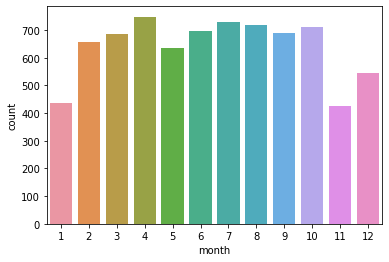

In [55]:
sns.countplot(df_train.month)

                               Visualising Categorical Features:                                


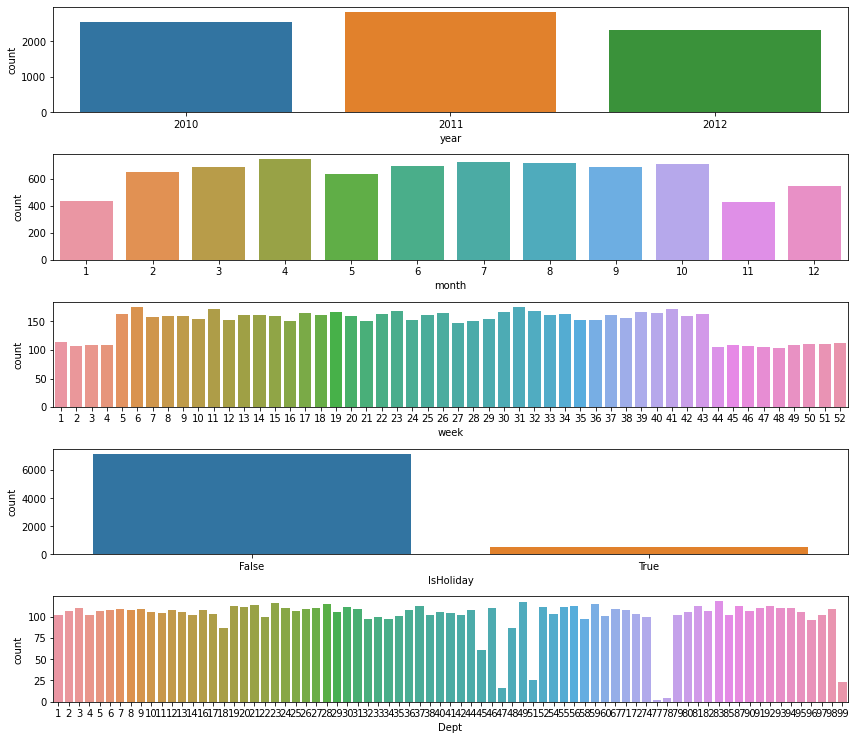

In [56]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

plt.figure(figsize=(12,12))

for i in range(len(categoricalFeatures)):
    plt.subplot(6,1,i+1)
    sns.countplot(df_train[categoricalFeatures[i]])
plt.tight_layout();

❓ Question 6: 

Discuss with your pair programming partner: There is less data in 2012 than the previous two years, did the sale drop from previous years? Does it affect what we see in the plots for month and week? Does the plot below clarify it to some degree?

From examining the data, it's clear in 2012 df_train dataset, there isn't data after September, not sure why. I doubt that this data has gone into the test dataset, although it could have. Holidays are the busiest seasons of the year and if the data is missing these values (Oct, Nov, Dec) then it will seem as though the sales dropped, but it could be something else too. 

`YOUR ANSWER HERE`

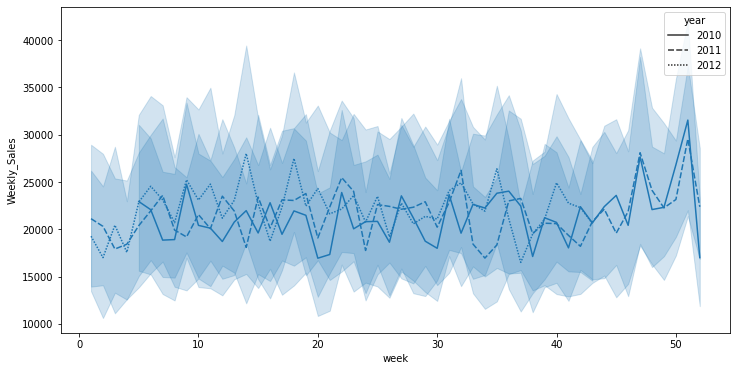

In [57]:
plt.figure(figsize=(12, 6))
#year_12 = df_train[df_train["year"] == 2012]
#year_12.head(10)
#year_12.describe()

#year_11 = df_train[df_train["year"] == 2011]
#year_11.head(10)
#year_11.describe()

#year_10 = df_train[df_train["year"] == 2010]
#year_10.head(10)
#year_10.describe()

sns.lineplot(data=df_train, x="week", y="Weekly_Sales",  style='year');

## Task III: Impact from Holidays

The first business objective is to understand the impact of holidays on weekly sales. 

There is a flag provided for us: `IsHoliday`, let's calculate the average weekly sales for holiday weeks and non-holiday weeks, respectively. For this, we will use `.groupBy` and `.mean()`. Are holiday sales higher?

In [58]:
df_train[df_train.IsHoliday].describe()
df_train_holidays = df_train.IsHoliday
df_train.groupby(['IsHoliday']).mean()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,547.00,547.00,547.00,547.00,547.00,231.00,231.00,231.00,231.00,231.00,547.00,547.00,547.00,547.00,547.00,547.00
mean,1.00,45.64,"23,157.49",57.01,3.09,"6,446.23","14,319.17","12,912.96","3,413.94","3,823.26",215.71,7.72,"151,315.00",31.76,7.75,"2,010.83"
std,0.00,30.16,"30,900.99",16.46,0.38,"4,796.91","19,648.42","23,456.02","3,296.35","2,312.46",4.13,0.34,0.00,18.67,4.11,0.75
min,1.00,1.00,0.05,36.39,2.55,410.31,35.74,50.94,8.00,554.92,211.24,6.91,"151,315.00",6.00,2.00,"2,010.00"
25%,1.00,21.00,"3,377.88",44.55,2.73,"5,204.68",98.00,101.64,983.65,"2,737.17",211.50,7.74,"151,315.00",6.00,2.00,"2,010.00"
50%,1.00,38.00,"10,793.97",48.43,3.13,"5,762.10","6,927.23",260.36,983.65,"4,735.78",215.86,7.84,"151,315.00",36.00,9.00,"2,011.00"
75%,1.00,74.00,"32,268.47",76.00,3.41,"9,843.58","46,011.38",260.36,"6,296.10","5,810.91",219.54,7.87,"151,315.00",47.00,11.00,"2,011.00"
max,1.00,99.00,"203,670.47",83.96,3.73,"13,925.06","46,011.38","55,805.51","8,471.88","6,886.04",222.44,8.11,"151,315.00",52.00,12.00,"2,012.00"


,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
IsHoliday,,,,,,,,,,,,,,,,
False,1.00,44.40,"21,595.65",69.02,3.23,"8,177.65","1,855.53",109.20,"3,749.30","5,142.36",216.04,7.60,"151,315.00",25.38,6.35,"2,010.98"
True,1.00,45.64,"23,157.49",57.01,3.09,"6,446.23","14,319.17","12,912.96","3,413.94","3,823.26",215.71,7.72,"151,315.00",31.76,7.75,"2,010.83"


<details>
<summary>Expected Output</summary>

```
IsHoliday
False   21,756.05
True    23,737.05
Name: Weekly_Sales, dtype: float64
```
</details>


But we would like to understand it at more granular level, remember [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson's_paradox)? To save some time,  date mapping are identified for the training data

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
- Thanksgiving: 26-Nov-10, 25-Nov-11
- Christmas: 31-Dec-10, 30-Dec-11

We create a flag for each holiday to help you analyze weekly sale by each holiday type

In [59]:
superbowl_mask = df_train['Date'].isin(['2010-02-12', '2011-02-11', '2012-02-10'])
laborday_mask = df_train['Date'].isin(['2010-09-10', '2011-09-09','2012-09-07'])
thanksgiving_mask = df_train['Date'].isin(['2010-11-26', '2011-11-25'])
christmas_mask = df_train['Date'].isin(['2010-12-31', '2011-12-30'])

In [60]:
df_train['superbowl'] = superbowl_mask
df_train['laborday'] = laborday_mask
df_train['thanksgiving'] =thanksgiving_mask
df_train['christmas'] = christmas_mask

Run the next cell to see 1) how many weekly sales fell on Christmas (does it make sense? what did we not account for?) 2) what is the average weekly sales stratified by whether it is Christmas week or not?

In [61]:
df_train.groupby(['christmas'])\
        .agg(count = ('christmas', 'size'), 
             avg_weekly_sales = ('Weekly_Sales','mean'))

,count,avg_weekly_sales
christmas,,
False,7570,"21,732.30"
True,113,"20,002.07"


Perform the same for the other three holidays:

In [62]:
df_train.groupby(['superbowl'])\
        .agg(count = ('superbowl', 'size'), 
             avg_weekly_sales = ('Weekly_Sales','mean'))

,count,avg_weekly_sales
superbowl,,
False,7507,"21,680.13"
True,176,"22,846.63"


In [63]:
holidays = ['superbowl', 'laborday', 'thanksgiving', 'christmas']
for holiday in holidays:
  df_train.groupby([holiday])\
        .agg(count = (holiday, 'size'), 
             avg_weekly_sales = ('Weekly_Sales','mean'))
    #summary_stats = df_train.groupby([holiday])
    #print(summary_stats)


,count,avg_weekly_sales
superbowl,,
False,7507,"21,680.13"
True,176,"22,846.63"


,count,avg_weekly_sales
laborday,,
False,7530,"21,688.51"
True,153,"22,609.39"


,count,avg_weekly_sales
thanksgiving,,
False,7578,"21,621.41"
True,105,"27,873.05"


,count,avg_weekly_sales
christmas,,
False,7570,"21,732.30"
True,113,"20,002.07"


<details>
<summary>Expected Output</summary>

```
           count  avg_weekly_sales
superbowl                         
False       8001         21,845.80
True         181         24,311.98

          count  avg_weekly_sales
laborday                         
False      8007         21,884.35
True        175         22,632.78

              count  avg_weekly_sales
thanksgiving                         
False          8067         21,813.97
True            115         27,959.84

           count  avg_weekly_sales
christmas                         
False       8057         21,921.06
True         125         20,565.56
```
</details>


Without hypothesis testing and by only eyeballing, it seems like Super Bowl and Thanksgiving has a positive impact on the weekly sales for Store 1 in this training dataset. 
Discuss with your teammate, are you surprised that during Christmas, sales at Walmart do not go up? Holiday effect, if causal, happened most during Thanksgiving weeks, is this something you expected?

Eyeballing suggests only during Super Bowl and Thanksgiving, do the weekly sales go up, but not for Christmas, which makes sense. Most people are home that day, their shopping done. I did expect Thanksgiving average weekly sales to be higher than Christmas average weekly sales, but I don't understand why average weekly sales during Super Bowl is a tad bit high. It is minor, however. Maybe because during Super Bowl, the items bought are food and drink, which are not expensive items and therefore, do not change the average significantly. On the other hand, Thanksgiving shopping is far more intense, varied, and expensive, and across many different departments.

We have been ignoring `Dept`, let's take a look at the plot below showing the weekly sales by department in 2011. 

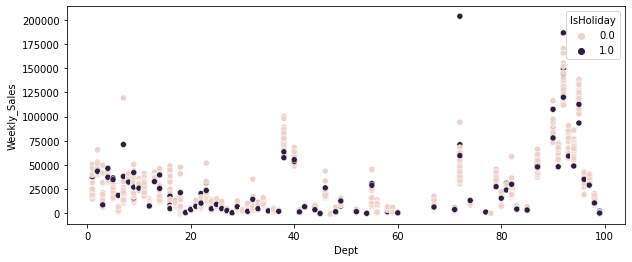

In [64]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df_train[df_train.year==2011], x = 'Dept', y= target, hue='IsHoliday');

Dept 72 has a very unusual high weekly sales during the holiday week, but we will need more data to understand if this is data issue, outlier, or special event. 

## Task IV: Visualize Relationship between Macroeconomic & External Factors and Sales

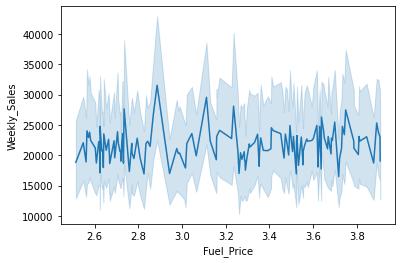

In [65]:
sns.lineplot(data=df_train, x="Fuel_Price", y="Weekly_Sales");

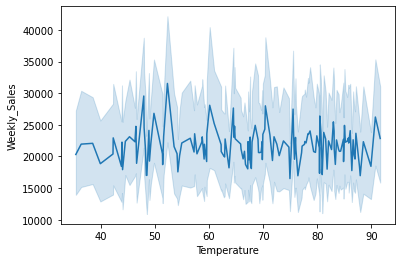

In [66]:
sns.lineplot(data=df_train, x="Temperature", y="Weekly_Sales");

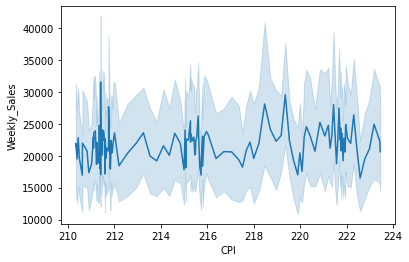

In [67]:
sns.lineplot(data=df_train, x="CPI", y="Weekly_Sales");

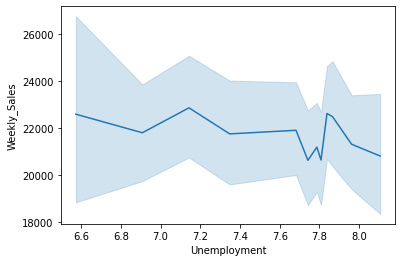

In [68]:
sns.lineplot(data=df_train, x="Unemployment", y="Weekly_Sales");

By eyeballing, do you find strong evidence that those are correlated with Walmart's weekly sales? Do you think `lineplot` is an appropriate plot for this?

Lastly, we calculate the spearman correlations among target and external factors and verify that there is no strong linear correlation between the target variable and these features.

In [69]:
external_factors

#plt.figure(figsize=(6, 6))
#df_train_reduced = df_train[[target] + external_factors]
#corr = df_train_reduced.corr(method='spearman')
#heatmap = sns.heatmap(corr.sort_values(by=target, ascending=False),
#                      vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='BrBG')
#heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':12}, pad=16);

['Temperature', 'CPI', 'Unemployment', 'Fuel_Price']

## Task V: Feature Engineering

"*Feature Engineering encapsulates various data engineering techniques such as selecting relevant features, handling missing data, encoding the data, and normalizing it. It is one of the most crucial tasks and plays a major role in determining the outcome of a model.*" [Ref](https://www.analyticsvidhya.com/blog/2021/10/a-beginners-guide-to-feature-engineering-everything-you-need-to-know/).

One part of feature engineering is to create new features from given data, like `thanksgiving` column earlier was derived from `Date`. Common techniques for tabular data include to add summary statistics of the numerical features such as mean and standard deviation, to create new features from the interaction of multiple features, etc. In this task, however, we will work on handling missing data, normalizing numerical features, and encoding categorical features. 

First, missing data. Missing value treatment is crucial, yet not trivial. Take a read on [Tackling Missing Value in Dataset](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/) for detailed explanation. Features with nulls or wrong values (e.g., negative fuel price) needs to be imputed or removed. 

- Do you want to keep the features with missing value? Discuss the trade offs
- If answer to the first question is yes, then how do you want to impute them? Discuss the trade offs

From ealier steps, we observed that only the markdown columns contain missing values, yet we do not have more information on what those values are for.  

In [70]:
df_train.columns[df_train.isna().sum() != 0]

Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], dtype='object')

For each column, find out the percentage of the data is missing

In [71]:
md_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in ['MarkDown'+str(i) for i in range(1,6)]:
    perc_missing =  df['MarkDown'+str(i)].isna().sum()/len(df)*100
    print(perc_missing)
    #print ('{col}: {perc_missing:.0%} is missing')

64.30105427567356
64.30105427567356
64.30105427567356
64.30105427567356
64.30105427567356


<details>
<summary>Expected Output</summary>

```
MarkDown1: 64% is missing
MarkDown2: 70% is missing
MarkDown3: 65% is missing
MarkDown4: 64% is missing
MarkDown5: 64% is missing
```
</details>


The majority of the markdown fields are missing. This is where, again, we need to communicate with the stakeholders to understand what the data measure, how the data was collected and then determine our strategy from there. Since we want to understand the impacts of `MarkDownx` on weekly sales, we will keep the features and impute the missing values.  We have learned that there are tradeoffs with how we treat missing values and that our choice of imputation can be significantly impacted by extreme values and the amount of the missing data.  We choose to impute with the median here to mitigate these negative impacts. Use `.fillna()` to impute the missing values.

In [72]:
# YOUR CODE HERE # this works for smaller dataset

In [74]:
(df_train.isna().sum() != 0).sum() # sanity check: 0

5

Visualize the distributions for those markdown fields after imputations, are they normal?

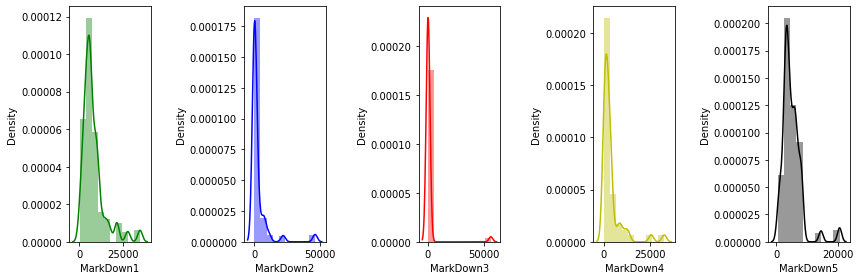

In [160]:
plt.figure(figsize=figsize)
for i in range(len(md_cols)):
    plt.subplot(1,len(md_cols),i+1)
    sns.distplot(df_train[md_cols[i]],
                 hist_kws=dict(linewidth=2),
                 bins=10, 
                 color = colors[i])
plt.tight_layout();

Note that missing values are different from outliers. Outliers, on the other hand, are feature values that are rare in nature. They can unncessarily skew the data and causes problem for modeling. Outlier treatment involves removing or imputing such values. One popular approach to identify outliers is IQR; that is, data points that lie 1.5 times of IQR above Q3 (third quartile) and below Q1 (first quartile) are outliers. Take a read on [Detecting and Treating Outliers](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/). We will leave it as an optional exercise for you to identify outliers using IQR, and replace the outliers with the median.

Now let's see how we normalize the data. For numerical features it means scaling the features to be of similar range. This step is crucial for machine learning algorithms that calculate distances between data (e.g., read [The Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). 

For this task, of the external features, let's keep Temperature since it is the most linearly correlated with the target variable, though very weak and negative ( feature selection ). In addition, we include one markdown field. Since neither seems to follow normal distributions, it is safer to use `MinMaxScaler` from `sklearn.preprocessing` to transform features by scaling each feature to a given range (See discussion on [Normalization vs Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/))

In [73]:
from sklearn.preprocessing import MinMaxScaler

numericalFeatures = ['Temperature', 'MarkDown1']
df_train_num = df_train[numericalFeatures]

In [75]:
df_train_num.describe() # Check the summary statistics

,Temperature,MarkDown1
count,"7,683.00","2,748.00"
mean,68.17,"8,032.10"
std,14.29,"6,511.50"
min,35.40,410.31
25%,57.79,"4,039.39"
50%,69.31,"6,154.14"
75%,80.49,"9,873.33"
max,91.65,"34,577.06"


Instantiate a MinMaxScaler and fit using `df_train_num`:

In [76]:
scaler = MinMaxScaler()

print(scaler.fit(df_train_num))
print(scaler.data_max_)
print(scaler.data_min_)

MinMaxScaler()
[   91.65 34577.06]
[ 35.4  410.31]


Now transform training data `df_train_num` and store the resulting nparray in `train_norm`:

In [77]:
train_norm = scaler.transform(df_train_num) 

Verify that both columns now have minimum 0 and maximum 1. 

In [78]:
pd.DataFrame(train_norm, columns=df_train_num.columns).describe()

,Temperature,MarkDown1
count,"7,683.00","2,748.00"
mean,0.58,0.22
std,0.25,0.19
min,0.00,0.00
25%,0.40,0.11
50%,0.60,0.17
75%,0.80,0.28
max,1.00,1.00


In [ ]:
# Expected Output:

Let's turn to categorical fatures. So far most, if not all Python packages for modeling do not accept strings as input; thus encoding the categorical value to numerical value is a necessary step. Here, let's apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) on `Dept` and `IsHoliday`:

In [114]:
from sklearn.preprocessing import OneHotEncoder
categoricalFeatures = ['Dept', 'IsHoliday']
df_train_cat = df_train[categoricalFeatures]
ohe = OneHotEncoder(handle_unknown='ignore',sparse = False).fit(df_train_cat)

In [121]:
df_train_cat.shape
df_train_cat.head(3)

(7683, 2)

,Dept,IsHoliday
4902,36,False
1331,10,False
2746,21,False


In [103]:
print(ohe)

OneHotEncoder(handle_unknown='ignore', sparse=False)


Transform the categorical features using one hote encoding `ohe`. 

In [125]:
train_ohe = ohe.fit(df_train_cat)
ohe.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
        58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
        91, 92, 93, 94, 95, 96, 97, 98, 99]), array([False,  True])]

In [123]:
train_ohe.shape
df_train_cat.shape 
# Expected Output: ((8182, 79), (8182, 2))

AttributeError: ignored

The number of columns explodes from 2 to 79. 

Lastly we merge the processed numerical features with the processed categorical features using `hstack` in `numpy`:

In [106]:
import numpy as np
X_train = np.hstack([train_norm, train_ohe])

ValueError: ignored

In [ ]:
X_train.shape # sanity check: (8182, 81)

What about the test data? Yes you need to apply the same treatments. We spare some copy + paste + edit and see how this can be done when we introduce `pipeline` next. 

## Task VI: Pipeline

Even with less than 20 features in our dataset, there are many many possibilities that you can preprocessing the data. There is no one-fits-all approach; often you will find yourself experimenting with many combinations to achieve better modelling performance: Should I apply normalization or standardization? Do I remove the outliers or should I impute them? Do I impute the missing values with median or mean or 0? Answers to many of these questions is "It depends." (Have you heard [Graduate Student Descent](https://sciencedryad.wordpress.com/2014/01/25/grad-student-descent/)?) That means trial-and-error and it is not efficient to produce a notebook each time when you need to try something slightly different. You will get lost quickly. Pipeline is one useful tool. 

Not only does Pipeline help streamline the process, keep the code modular, but also reduces the possibility of introducing errors/bugs. In this task, we build the pipeline following the strategies used in the last task, run a simple linear regression model, and print out the model's performance. Note there is minimal code required for you to implement, the key is to understand each step.

To avoid confusion, let's read the data again directly from `train-store1.csv`.

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/AnjanaSengupta/MLE-Oct-2022/main/assignments/week-04-data-eng-airflow/dat/train-store1.csv')

In [81]:
df.shape

(10244, 16)

Separating the target `y` from the features `X`:

In [137]:
target = df["Weekly_Sales"]
target.head(4)
y = target
X = df.drop(columns = "Weekly_Sales")
X.head(4)

0   24,924.50
1   46,039.49
2   41,595.55
3   19,403.54
Name: Weekly_Sales, dtype: float64

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,A,151315
1,1,1,2010-02-12,True,38.51,2.55,NaN,NaN,NaN,NaN,NaN,211.24,8.11,A,151315
2,1,1,2010-02-19,False,39.93,2.51,NaN,NaN,NaN,NaN,NaN,211.29,8.11,A,151315
3,1,1,2010-02-26,False,46.63,2.56,NaN,NaN,NaN,NaN,NaN,211.32,8.11,A,151315


Import `Pipeline` from submodule `sklearn.pipeline`

In [138]:
from sklearn.pipeline import Pipeline

Now we build a transformer for numerical features following two steps: impute the missing values with the feature median (use `SimpleImputer`), followed by normalization (use `MinMaxScaler`)

In [139]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
numeric_features = ['CPI', 'MarkDown1']
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), 
    # YOUR CODE HERE
])

For categorical features, we apply one hot encoding `OneHotEncoder` ( there are many other options; see [Scikit-learn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) ):

In [140]:
categorical_features = ['Dept', 'IsHoliday']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

Piece the `numeric_transformer` and `categorical_transformer` using `ColumnTransformer`:

In [141]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

Lastly, let's append the regression model to preprocessing pipeline to complete a full prediction pipeline.

In [142]:
from sklearn.linear_model import LinearRegression

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)

The pipepline has been built! The rest is to 
- split the data into training and testing sets
- apply the pipeline to the training data
- obtain the prediction performance on testing data

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's run the prediction!

In [144]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['CPI', 'MarkDown1']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Dept', 'IsHoliday'])])),
                ('model', LinearRegression())])

In [145]:
print("model score: %.3f" % model.score(X_test, y_test))

model score: 0.949


Optional: Discuss what type of [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) strategy you would use to select the features.

## Automating EDA

In this exercise, you have learned the manual way to perform EDA.  Doing EDA manually has the benefits of customization, but is also highly repetitive.  For this reason, a lot of EDA can easily be automated!  In automating our EDA, we can get to know our data more quickly and spend more time on feature engineering and modeling.  Let's check out a library called [SweetViz](https://github.com/fbdesignpro/sweetviz) to see how we can automate EDA! 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 27.5 MB/s 


                                             |          | [  0%]   00:00 -> (? left)


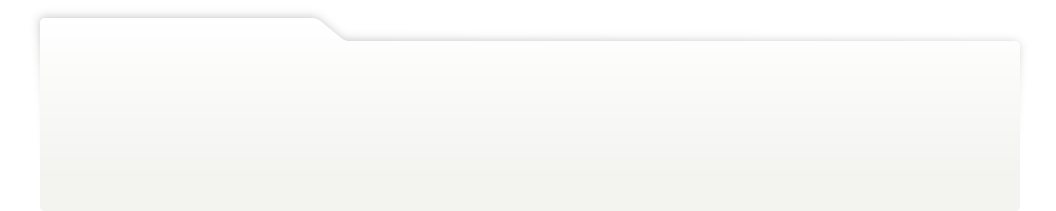
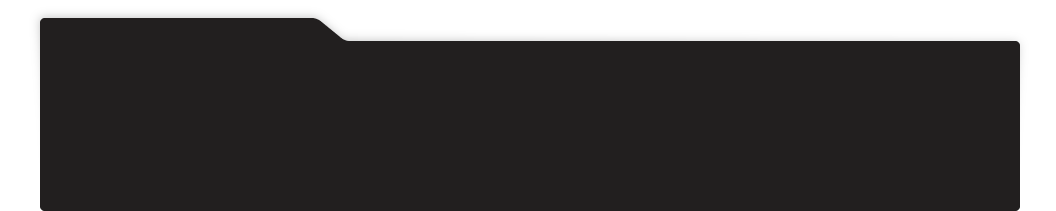
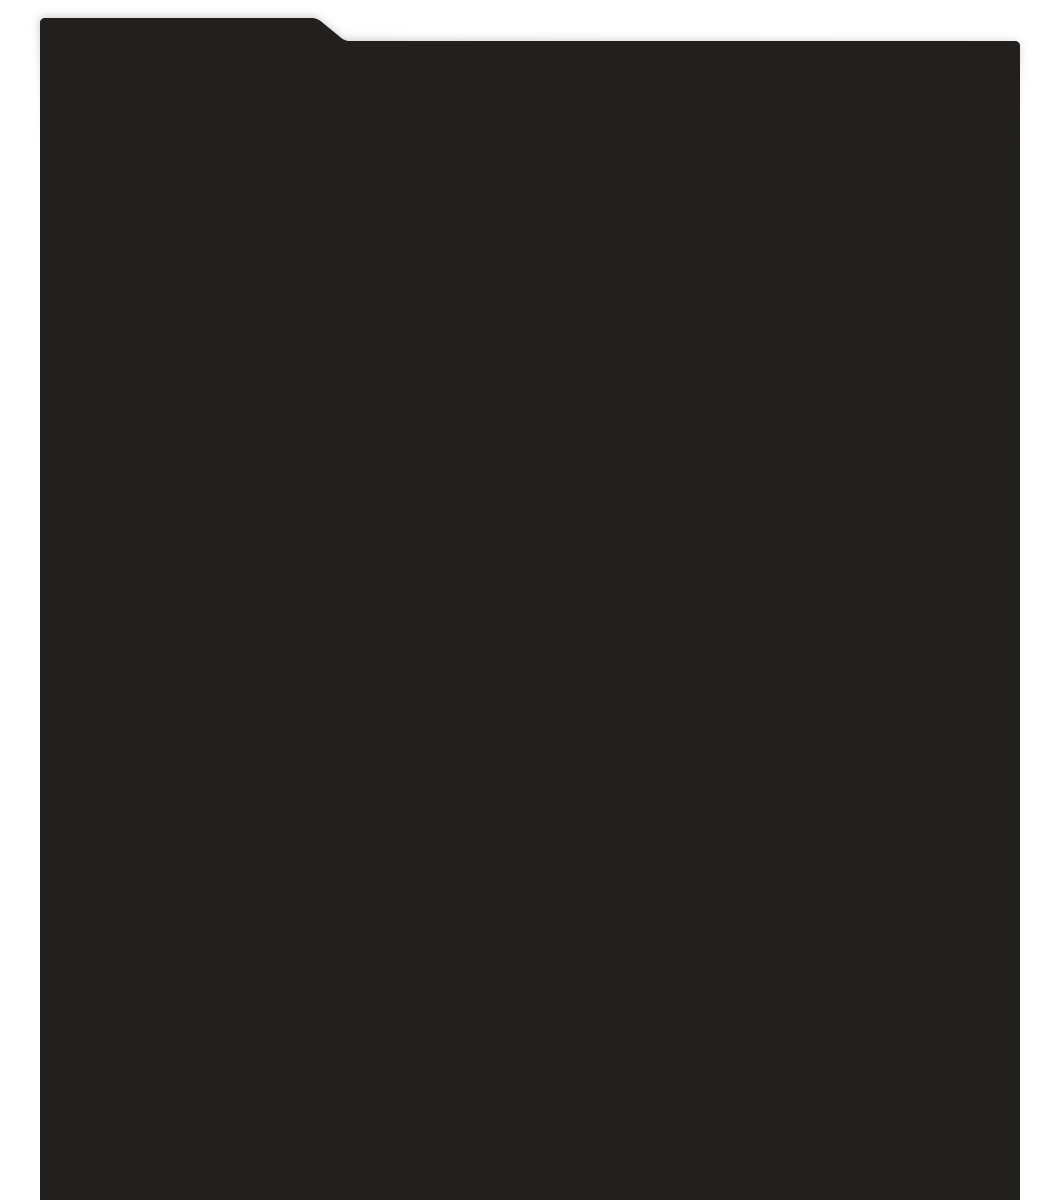
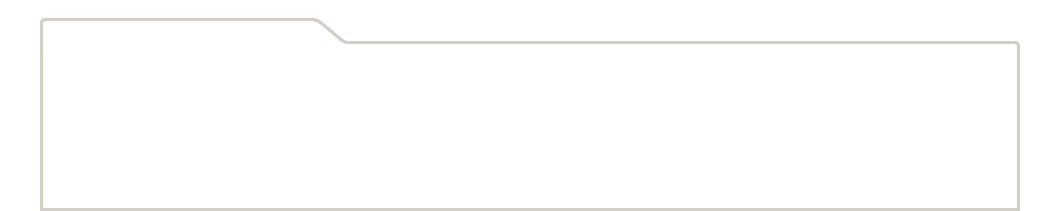
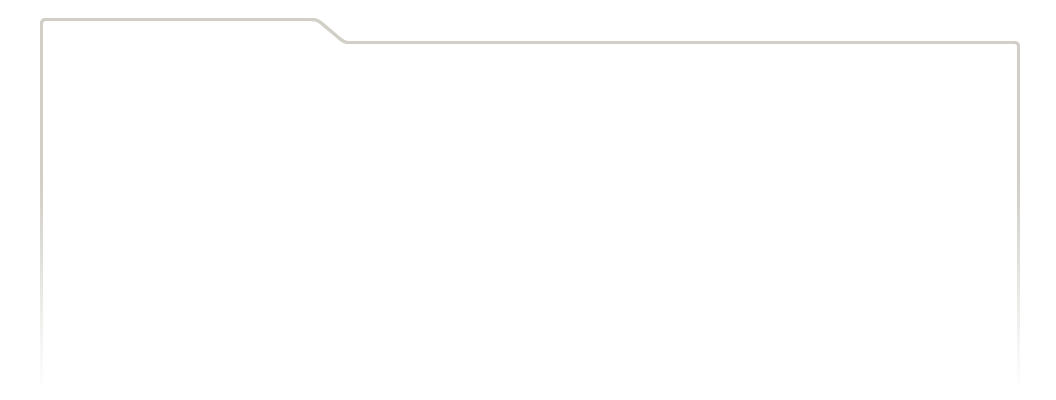
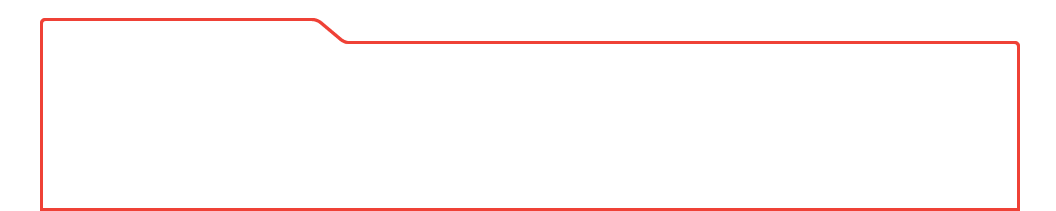
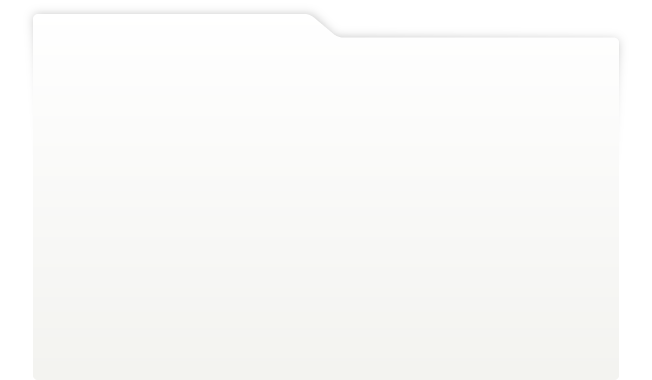
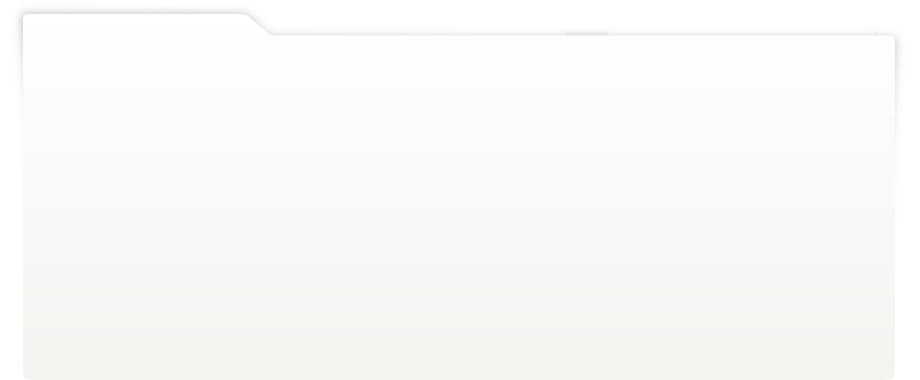
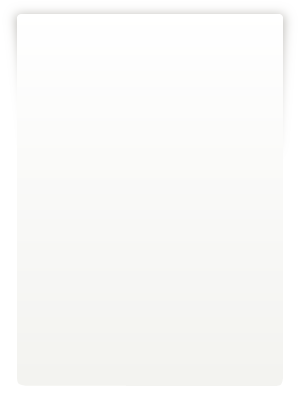
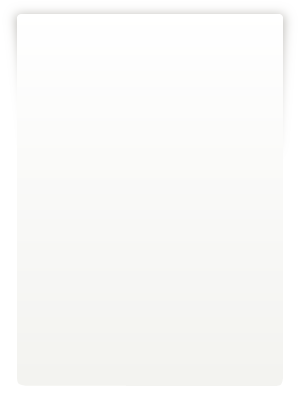
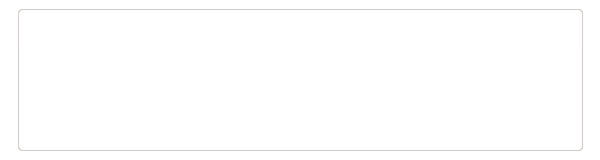
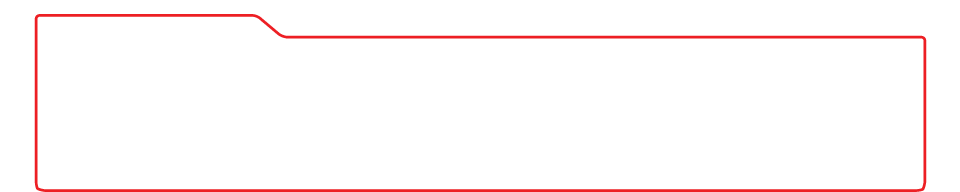
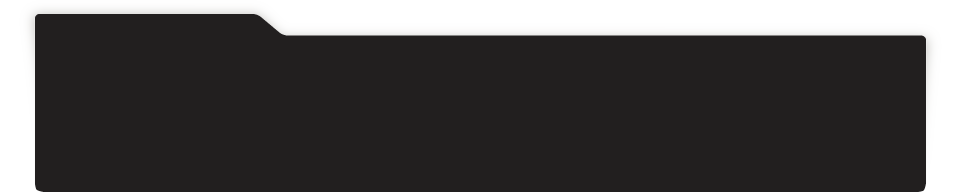
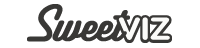
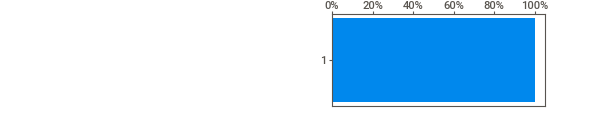
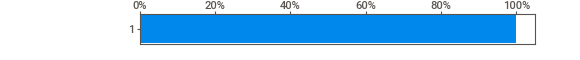
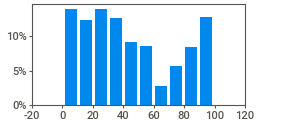
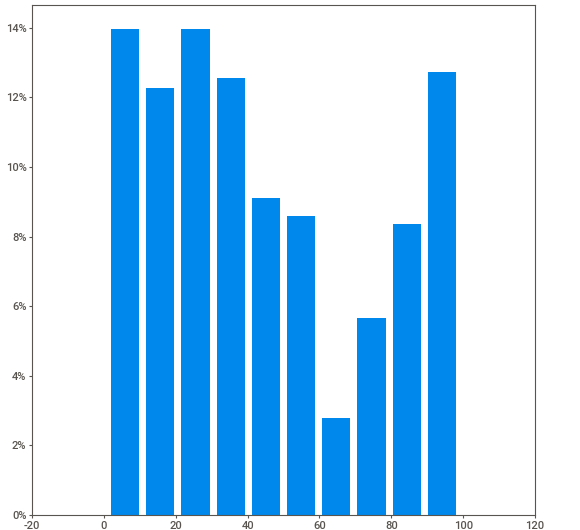
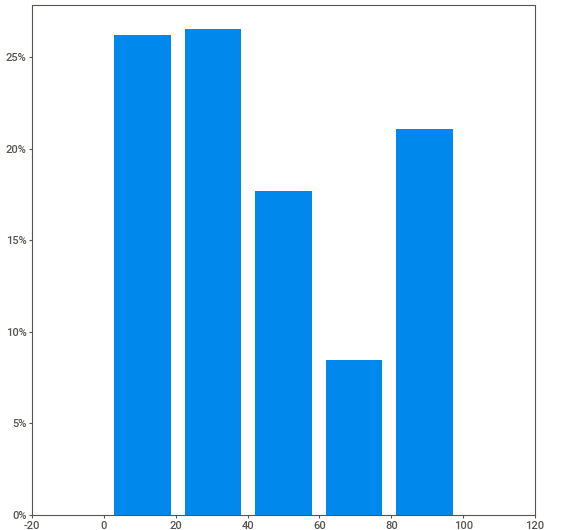
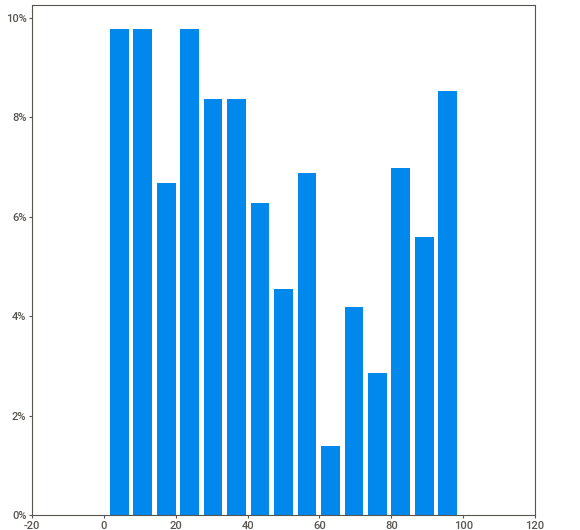
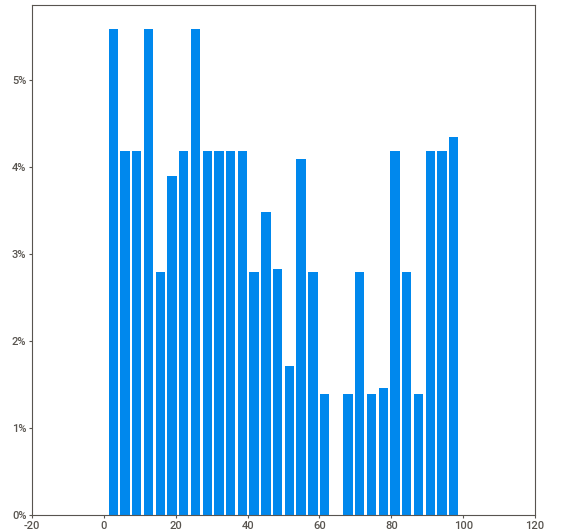
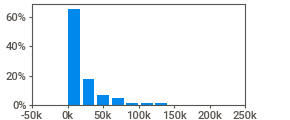
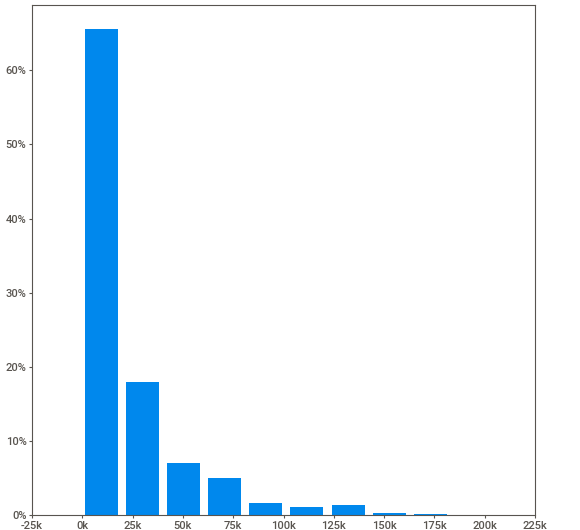
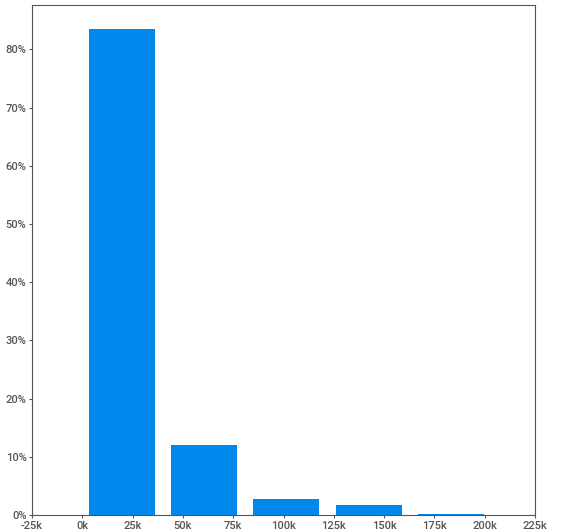
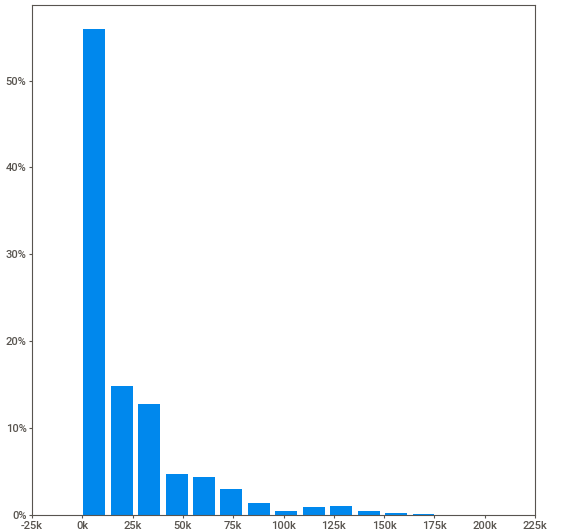
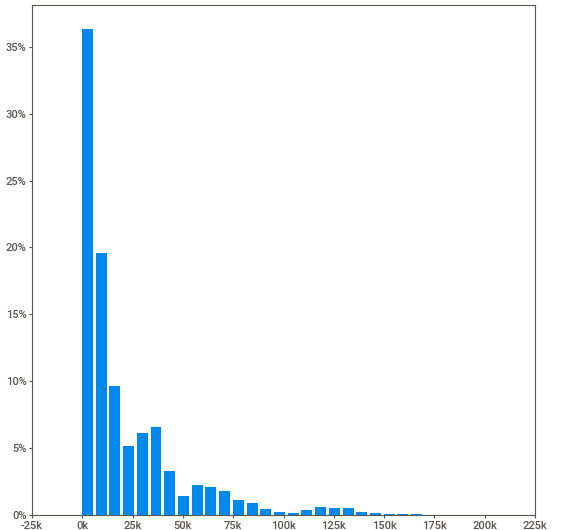
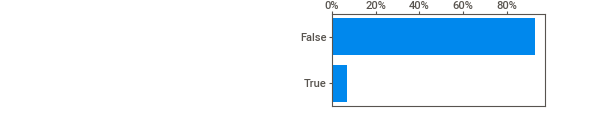
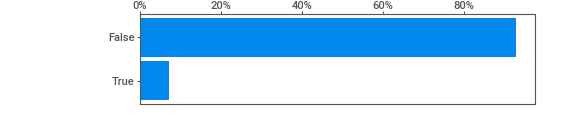
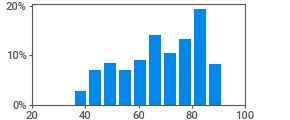
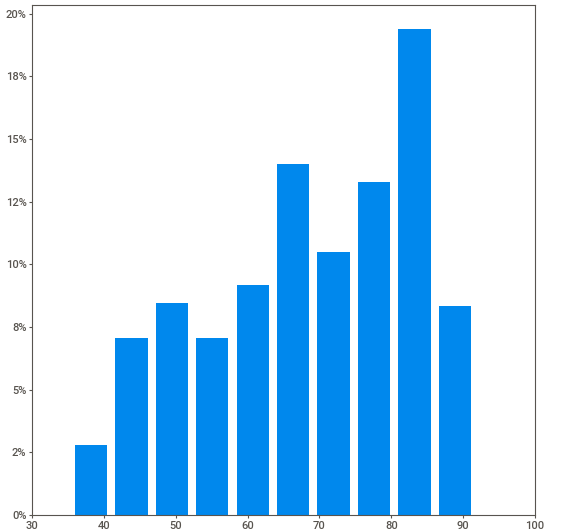
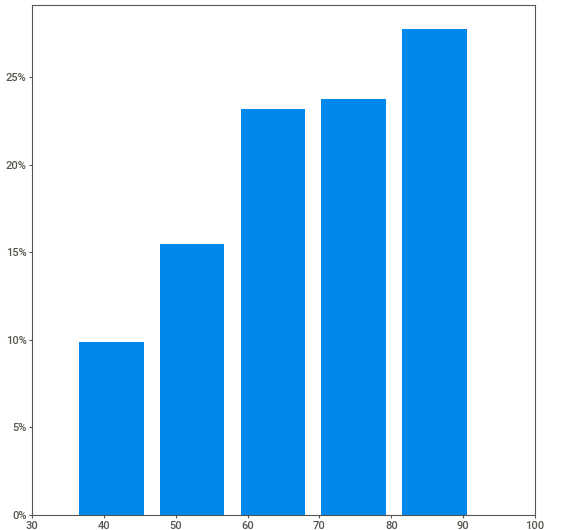
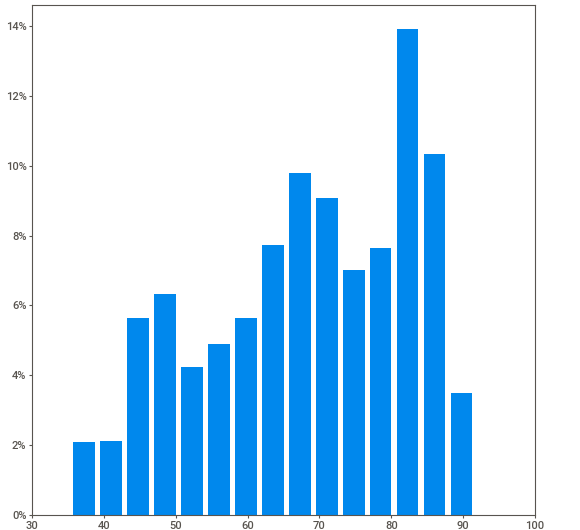
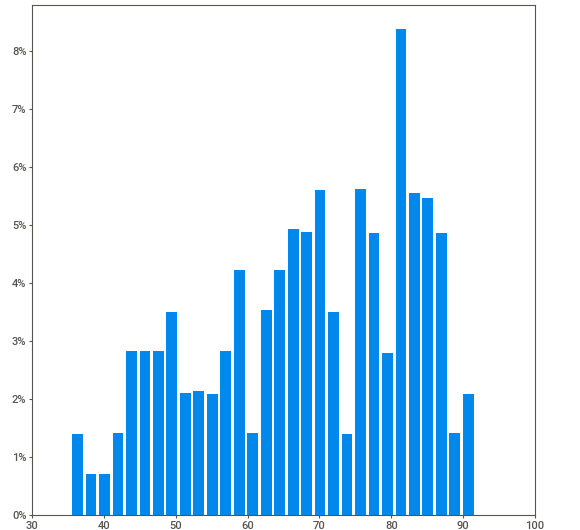
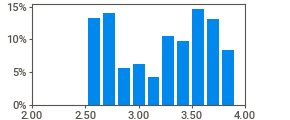
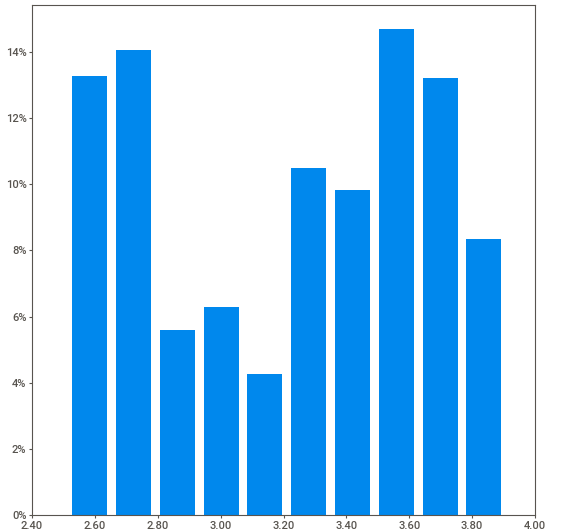
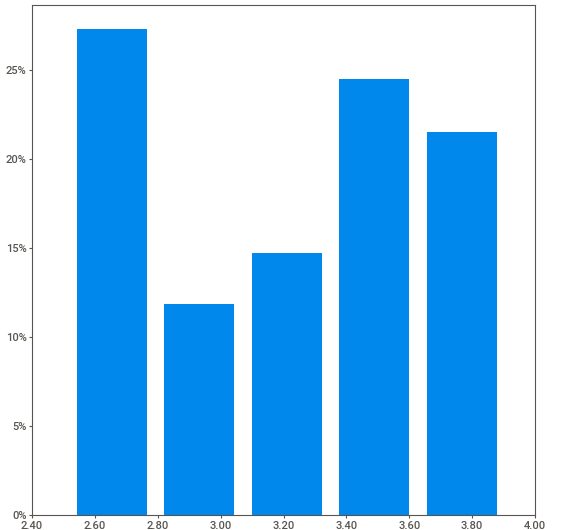
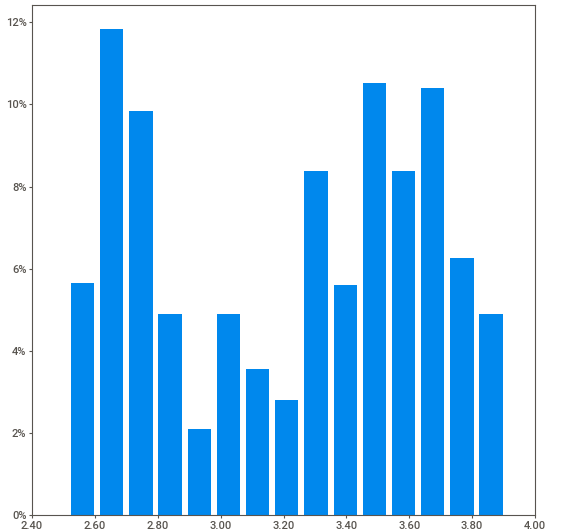
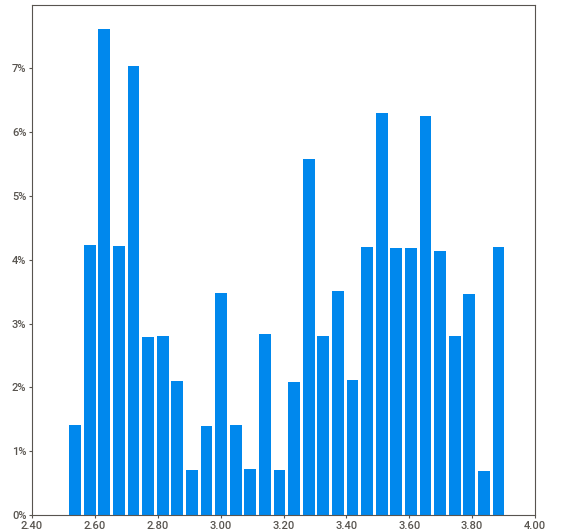
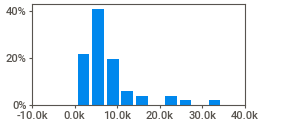
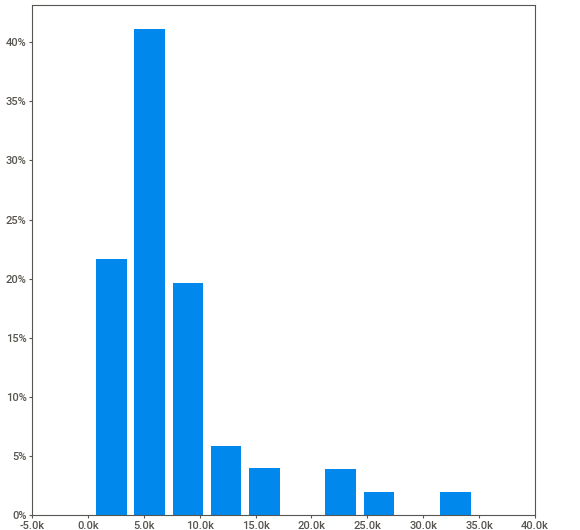
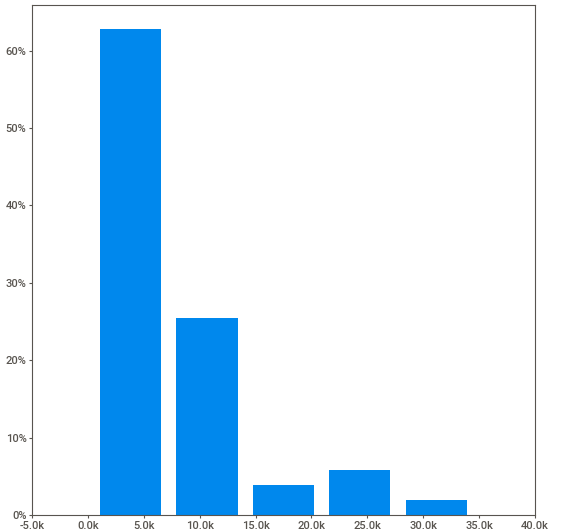
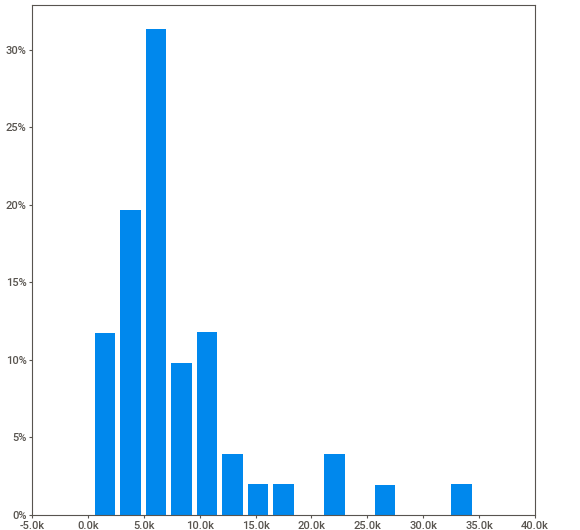
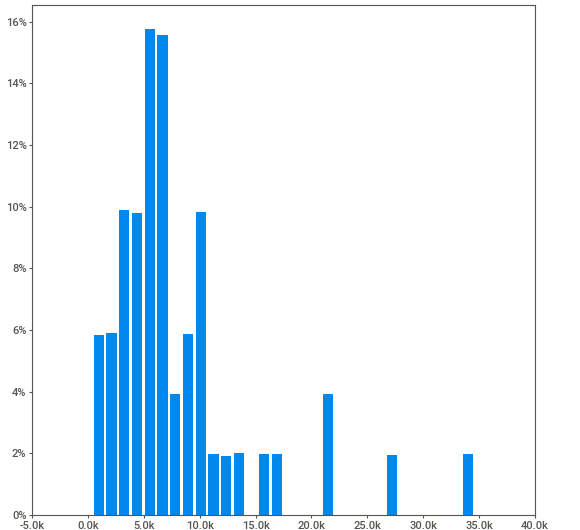
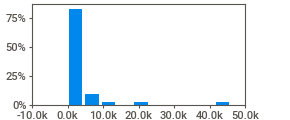
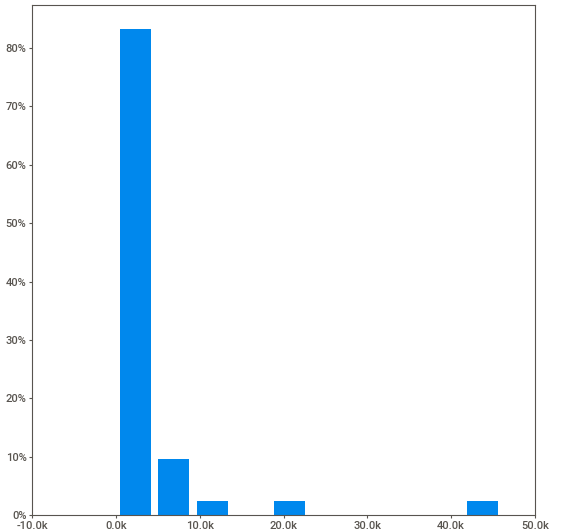
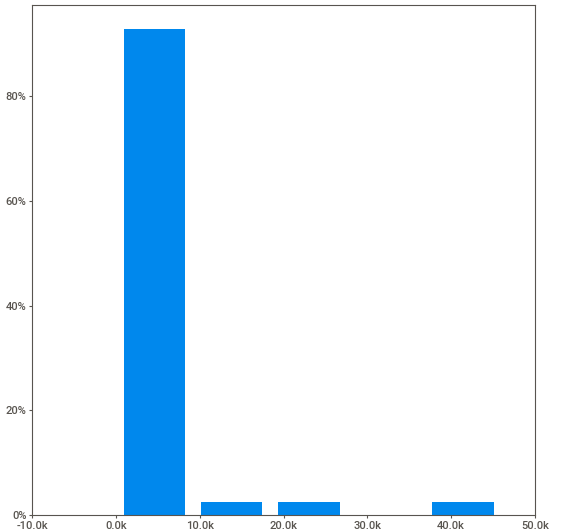
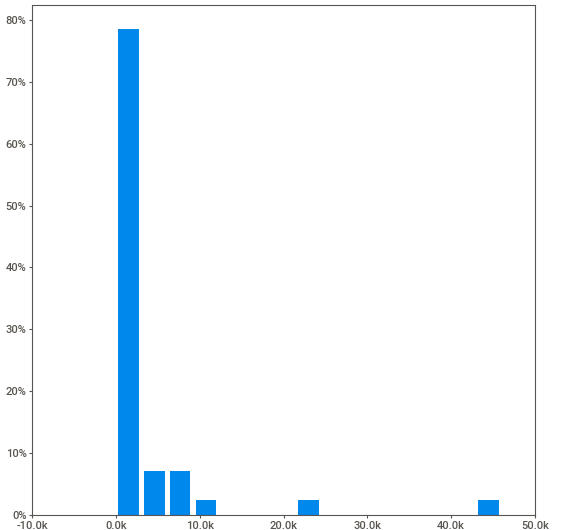
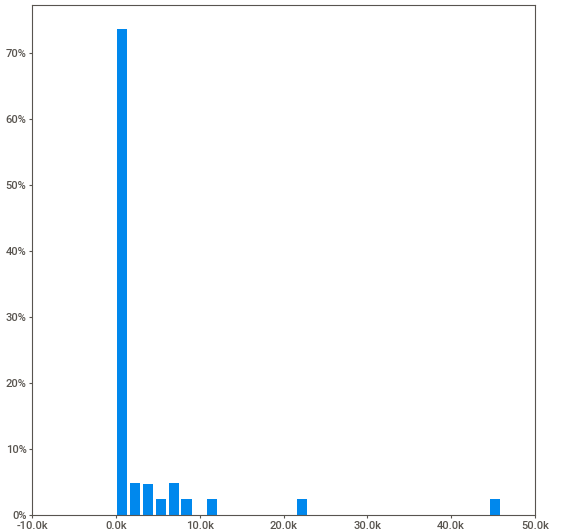
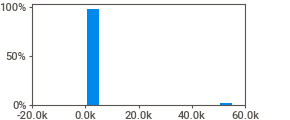
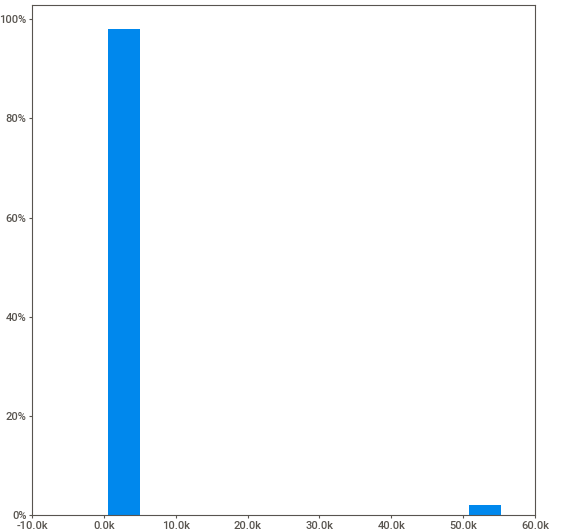
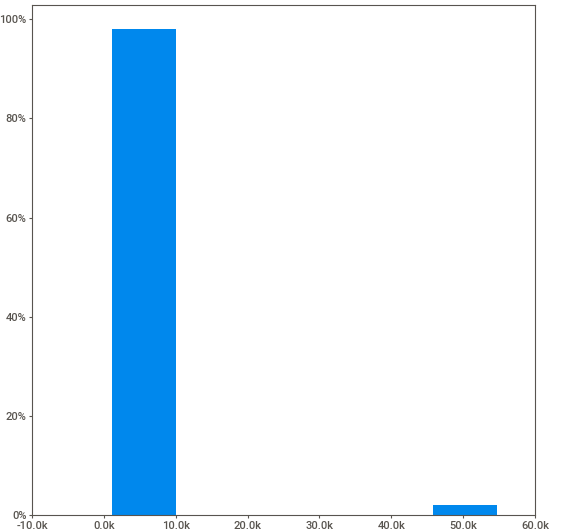
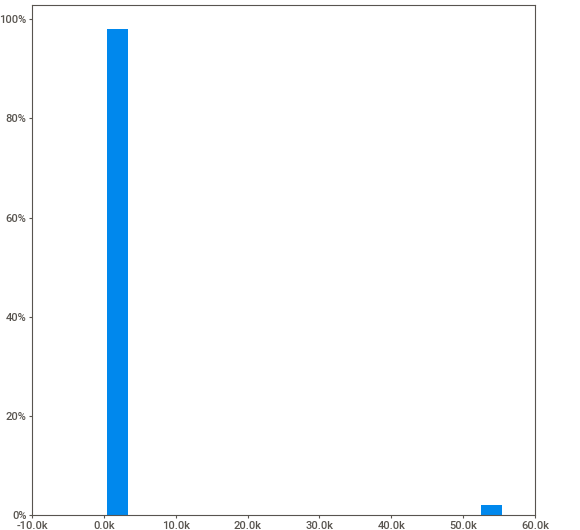
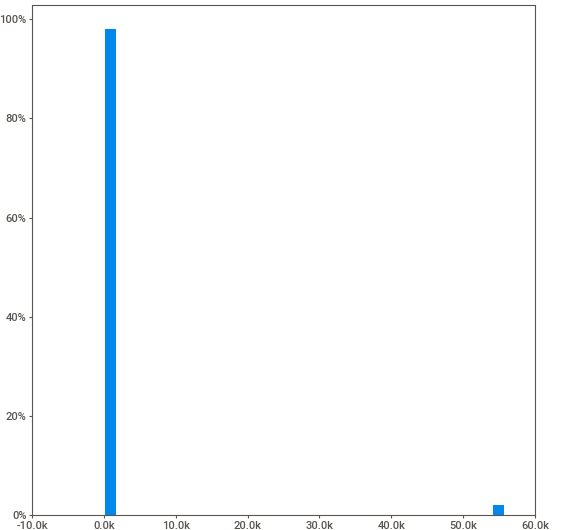
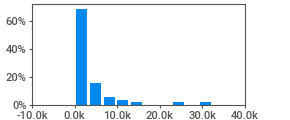
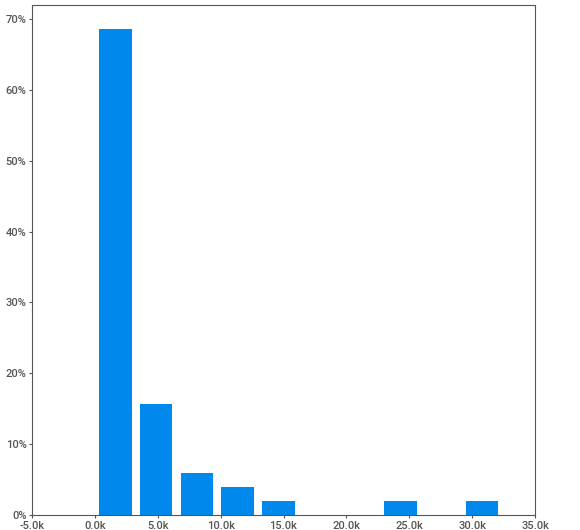
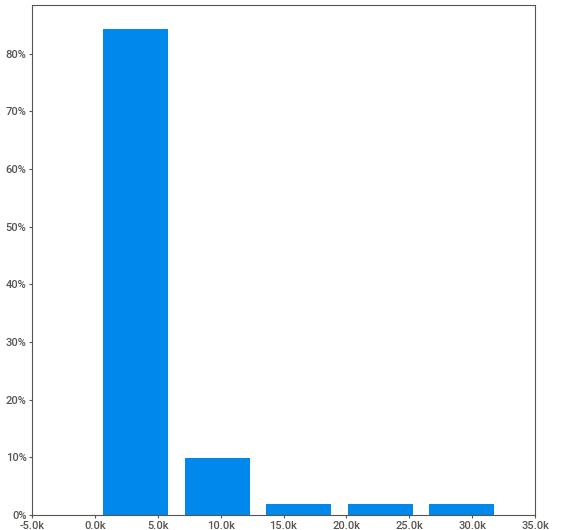
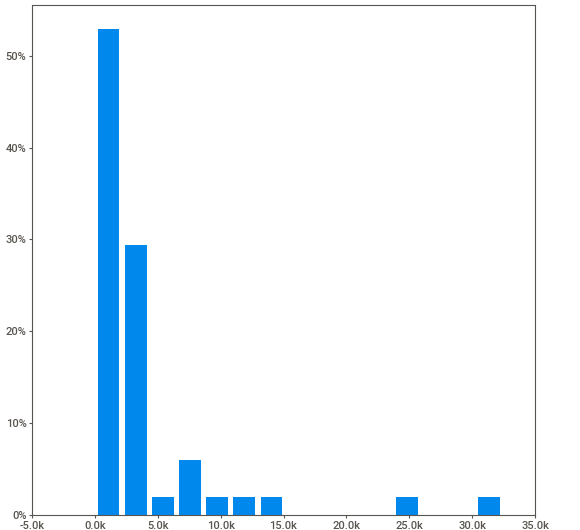
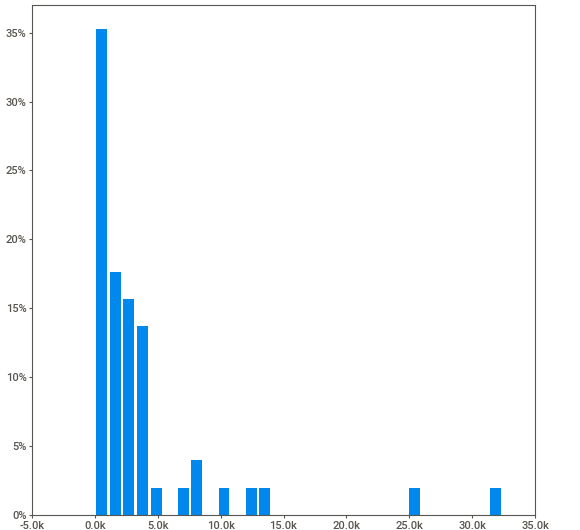
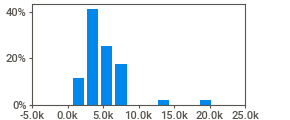
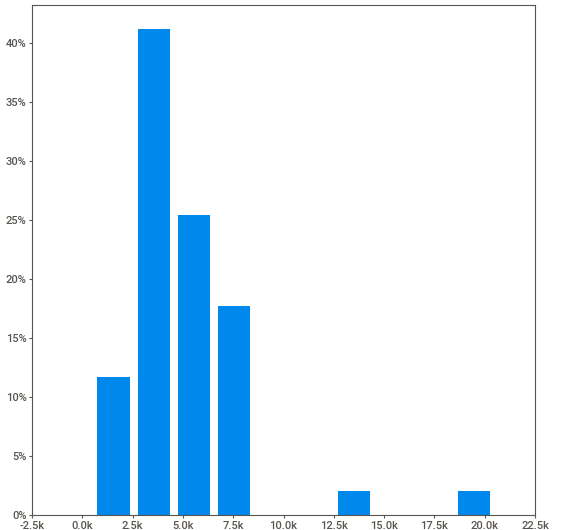
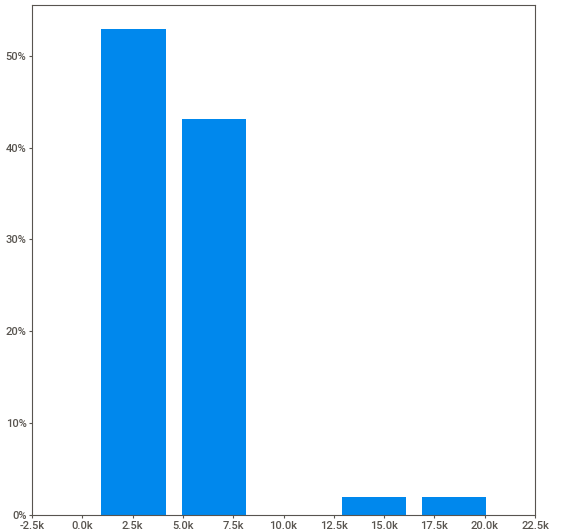
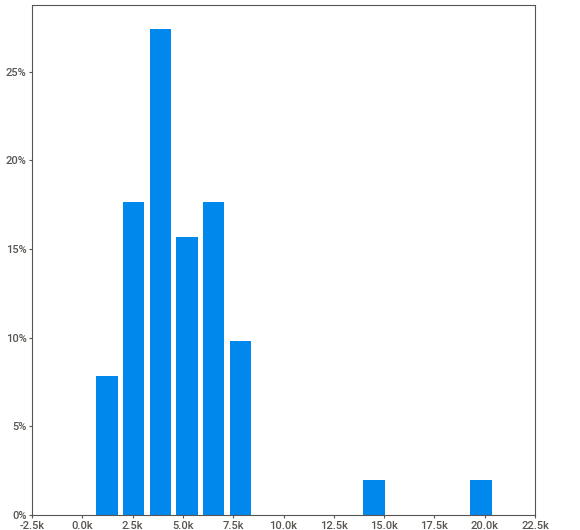
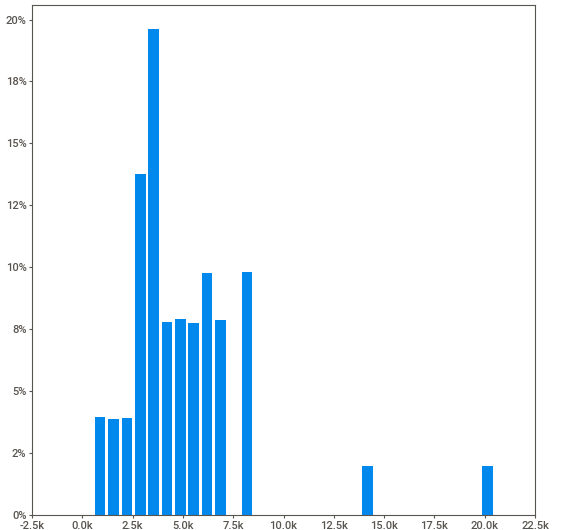
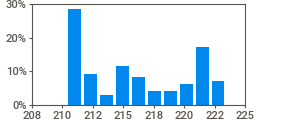
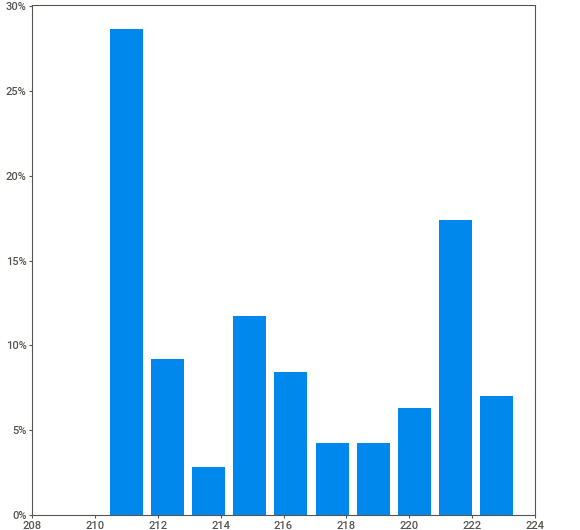
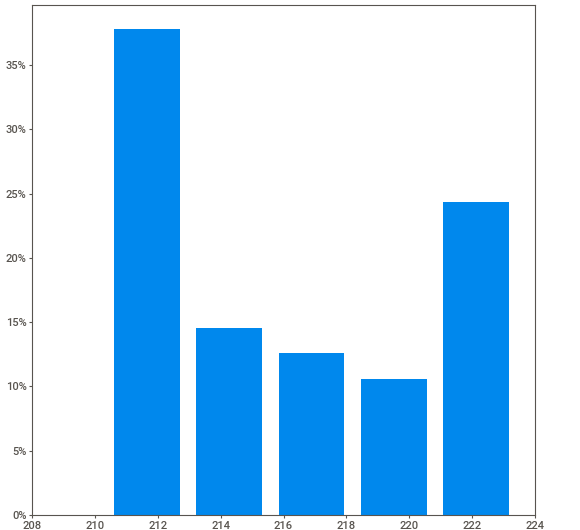
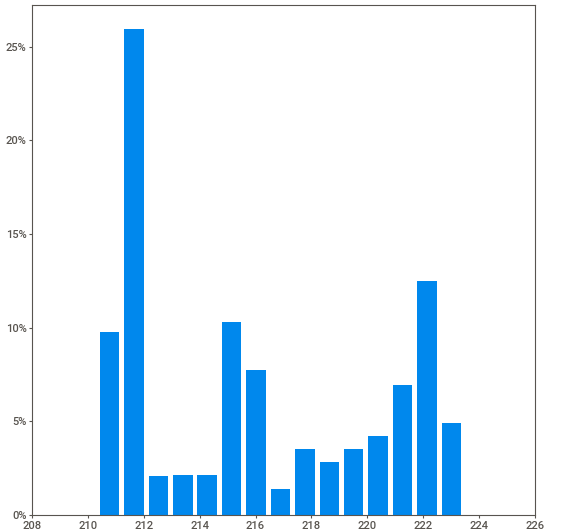
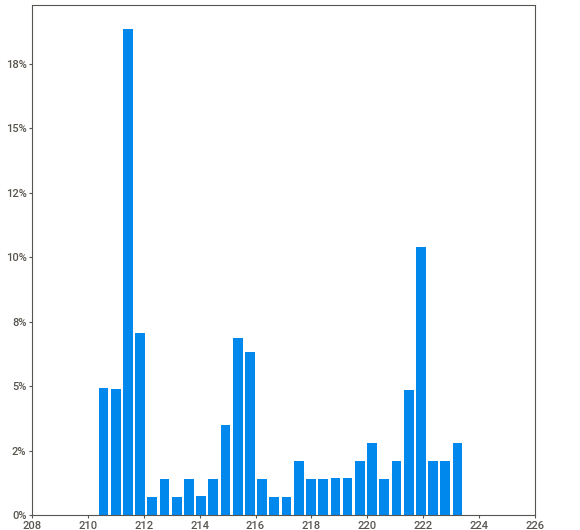
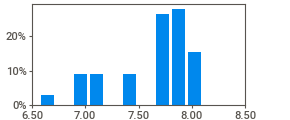
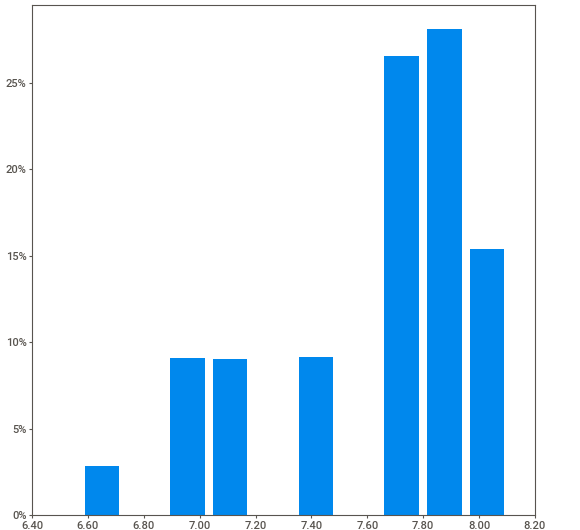
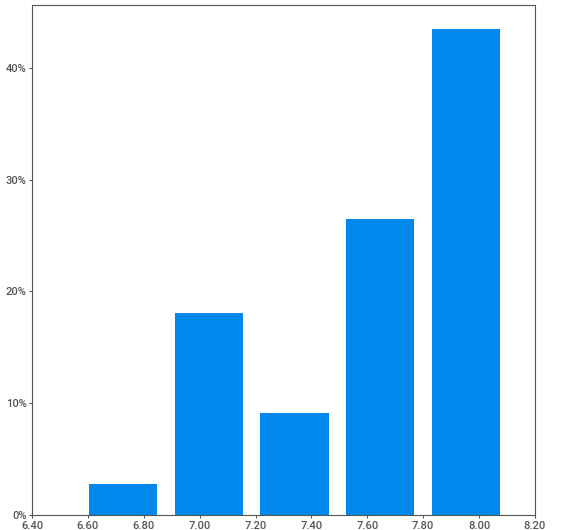
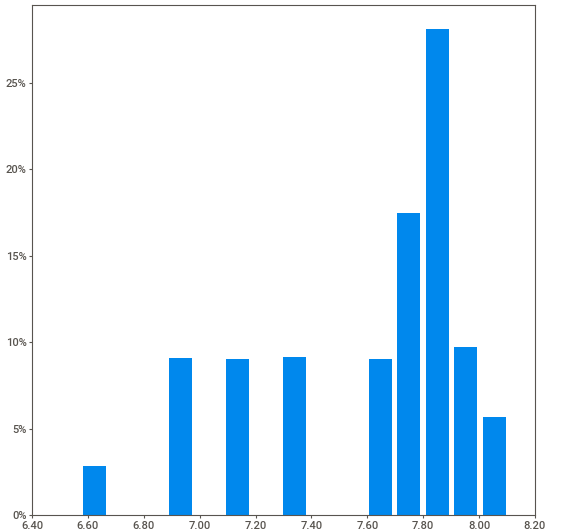
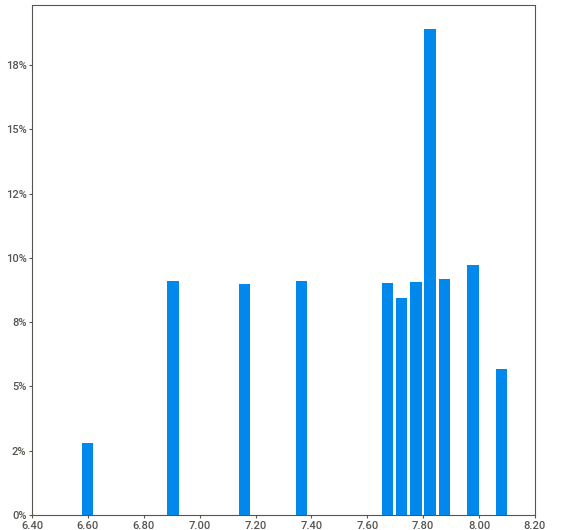
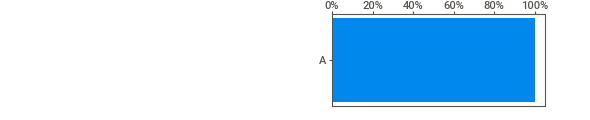
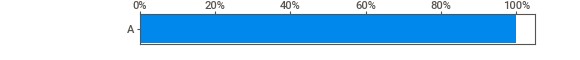
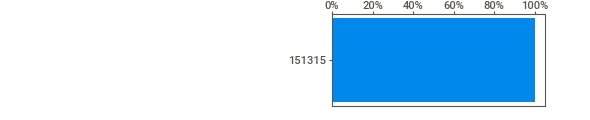
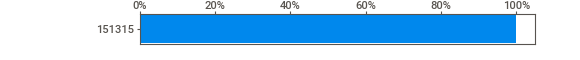
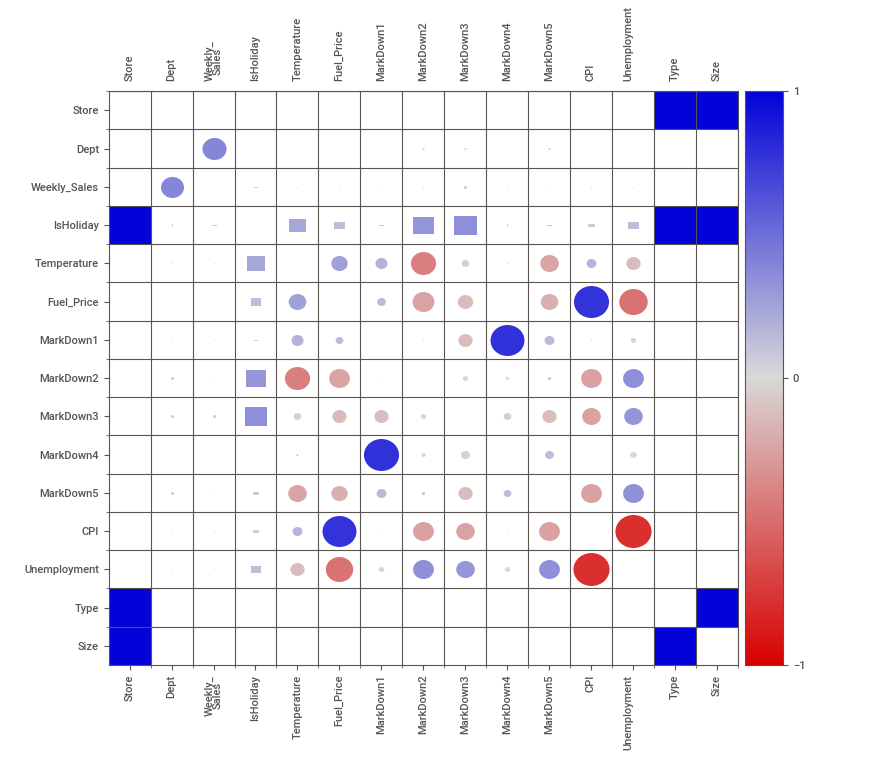
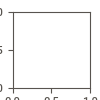

In [147]:
!pip install sweetviz
import sweetviz as sv

orig_data_report = sv.analyze(df)
orig_data_report.show_notebook()

1. Click on a feature to tab to explore the feature in more detail.
1. Notice that `SweetViz` calculates the descriptive stats for each feature, along with its missing and duplicate value stats.
1. Notice that `SweetViz` helps to detect numerical vs categorical datatypes.
1. Click on the `ASSOCIATIONS` tab to explore associations/correlations!

### Prefer a browswer experience?

In [ ]:
orig_data_report.show_html('orig_data_report.html', open_browser=True)

### Now let's have a look at a comparison report of our train and test datasets!

In [ ]:
compare_report = sv.compare([X_train, 'Train'], [X_test, 'Test'])
compare_report.show_notebook()

## Note

- EDA, like other parts of machine learning, is an iterative process, NOT linear.
- This analysis is far from being comprehensive; rather it is a starting point. 
- There does not exist one "standard" way to perform EDA. You should always keep business objectives in mind and perform analysis as seen fit. It is one of those skills that grows with lots of practices.

## References

1. Original dataset is from [kaggle: wallmart sales forecast datasets](https://www.kaggle.com/datasets/iamprateek/wallmart-sales-forecast-datasets)
2. Notebook: [craking the walmart sales forecasting challenge](https://www.kaggle.com/code/fernandol/cracking-the-walmart-sales-forecasting-challenge)